# Estimation of Obesity Levels Based on Eating Habits and Physical Condition

Key Features:
1. Gender (Categorical)
2. Age (Continuous): Age of the individual
3. Height (Continuous): Height in meters
4. Weight (Continuous): Weight in kilograms
5. family_history_with_overweight (Binary): Whether the individual has a family member suffering from overweight
6. FAVC (Binary): Whether the individual eats high-calorie food frequently
7. FCVC (Continuous): Frequency of vegetable consumption in meals
8. NCP (Continuous): Number of main meals consumed daily
9. CAEC (Categorical): Food consumption between meals
10. SMOKE (Binary): Whether the individual smokes
11. CH2O (Continuous): Amount of water consumed daily
12. SCC (Binary): Whether the individual monitors calorie intake
13. FAF (Continuous): Frequency of physical activity
14. TUE (Continuous): Time spent using technological devices
15. CALC (Categorical): Alcohol consumption frequency
16. MTRANS (Categorical): Mode of transportation used


Target Feature:

NObeyesdad (Categorical): Obesity level categorized into 7 classes.

1. Insufficient Weight
2. Normal Weight
3. Overweight Level I
4. Overweight Level II
5. Obesity Type I
6. Obesity Type II
7. Obesity Type III

## Data Importing and Cleaning

#### Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore') 

In [6]:
data =pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [7]:
df = data.copy(deep = True)

#### Import the dataset and inspect its structure

In [8]:
data.head()                #Displays the first 5 rows of the DataFrame for a quick overview.

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [9]:
data.tail()                 #Displays the last 5 rows of the DataFrame for a quick overview.

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

In [10]:
data.shape                  #Returns the dimensions of the DataFrame as a tuple.

(2111, 17)

In [11]:
data.info()                #Provides a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
data.dtypes                #Displays the data type of each column in the DataFrame.

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [13]:
data.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [14]:
data.isnull().sum()        #Shows the total number of missing (null) values in each column of the DataFrame.

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [15]:
data.duplicated().any()    #Checks if there are any duplicate rows in the DataFrame and returns True if duplicates exist, otherwise False.

True

In [16]:
data[data.duplicated()]   #Returns a DataFrame containing only the duplicate rows from the original DataFrame.

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0                             no  yes   3.0   
663  Female  21.0    1.52    42.0                             no  yes   3.0   
763    Male  21.0    1.62    70.0                             no  yes   2.0   
764    Male  21.0    1.62    70.0                             no  yes   2.0   
824    Male  21.0    1.62    70.0                             no  yes   2.0   
830    Male  21.0    1.62    70.0                             no  yes   2.0   
831    Male  21.0    1.62    70.0                             no  yes   2.0   
832    Male  21.0    1.62    70.0                             no  yes   2.0   
833    Male  21.0    1.62    70.0                             no  yes   2.0   
834    Male  21.0    1.62    70.0                             no  yes   2.0   
921    Male  21.0    1.62    70.0                             no  yes   2.0   
922    Male  21.0    1.62    70.0                             no  yes   2.0   
923    Male  21.0    1.62    70.0                             no  yes   2.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
98   1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
106  1.0   Sometimes    no   2.0  no  2.0  0.0  Sometimes   
174  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
179  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
184  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
209  3.0   Sometimes    no   2.0  no  1.0  1.0  Sometimes   
309  1.0   Sometimes    no   1.0  no  0.0  1.0         no   
460  3.0  Frequently    no   1.0  no  1.0  1.0         no   
467  3.0  Frequently    no   1.0  no  1.0  0.0         no   
496  3.0   Sometimes    no   2.0  no  0.0  2.0  Sometimes   
527  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
659  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
663  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
763  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
764  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
824  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
830  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
831  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
832  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
833  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
834  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
921  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
922  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
923  1.0          no    no   3.0  no  1.0  0.0  Sometimes   

                    MTRANS           NObeyesdad  
98   Public_Transportation  Insufficient_Weight  
106  Public_Transportation        Normal_Weight  
174  Public_Transportation   Overweight_Level_I  
179  Public_Transportation   Overweight_Level_I  
184  Public_Transportation   Overweight_Level_I  
209  Public_Transportation        Normal_Weight  
309                Walking        Normal_Weight  
460  Public_Transportation        Normal_Weight  
467             Automobile        Normal_Weight  
496

In [17]:
data = data.drop_duplicates()

In [18]:
data.shape

(2087, 17)

In [19]:
data.duplicated().any()

False

##### Count occurrences of unique values from each column

In [20]:
data['Gender'].value_counts()

Male      1052
Female    1035
Name: Gender, dtype: int64

In [21]:
data['family_history_with_overweight'].value_counts()

yes    1722
no      365
Name: family_history_with_overweight, dtype: int64

In [22]:
data['FAVC'].value_counts()

yes    1844
no      243
Name: FAVC, dtype: int64

In [23]:
data['CAEC'].value_counts()

Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64

In [24]:
data['SMOKE'].value_counts()

no     2043
yes      44
Name: SMOKE, dtype: int64

In [25]:
data['SCC'].value_counts()

no     1991
yes      96
Name: SCC, dtype: int64

In [26]:
data['CALC'].value_counts()

Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64

In [27]:
data['MTRANS'].value_counts()

Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [28]:
data['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

##### Pie chart of target variable

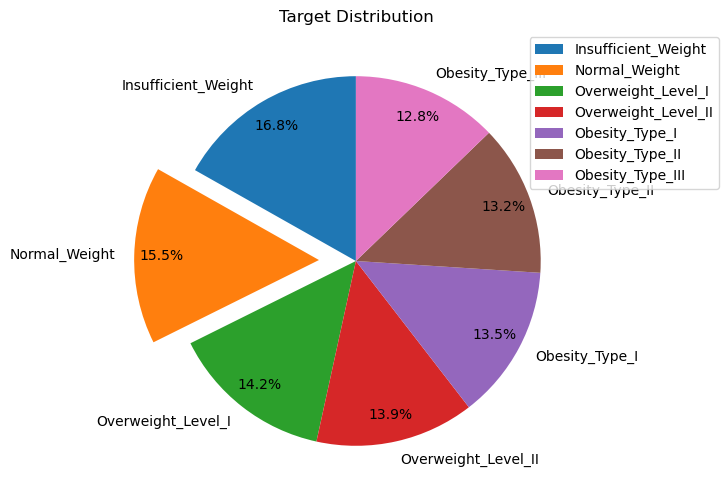

In [29]:
plt.figure(figsize=(6, 6))
myexplode = [0, 0.2, 0, 0, 0, 0, 0]
plt.pie(
    data['NObeyesdad'].value_counts(),
    labels=[
        'Insufficient_Weight',
        'Normal_Weight',
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III',
    ],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    explode=myexplode,
    labeldistance=1.1,  # Move labels outside the pie
)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust legend position
plt.title("Target Distribution")
plt.show()


##### Plot boxplots to detect outliers

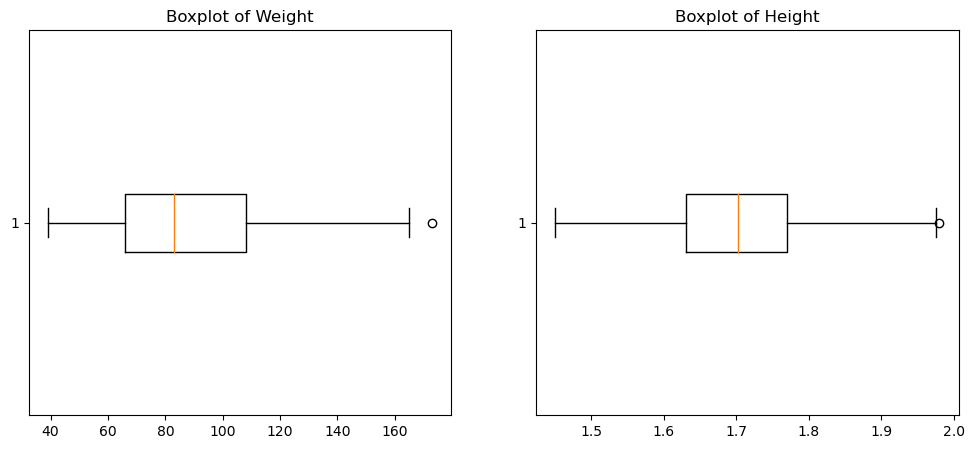

In [30]:
plt.figure(figsize=(12, 5))

# Boxplot for Weight
plt.subplot(1, 2, 1)
plt.boxplot(data['Weight'], vert=False)
plt.title('Boxplot of Weight')

# Boxplot for Height
plt.subplot(1, 2, 2)
plt.boxplot(data['Height'], vert=False)
plt.title('Boxplot of Height')

plt.show()


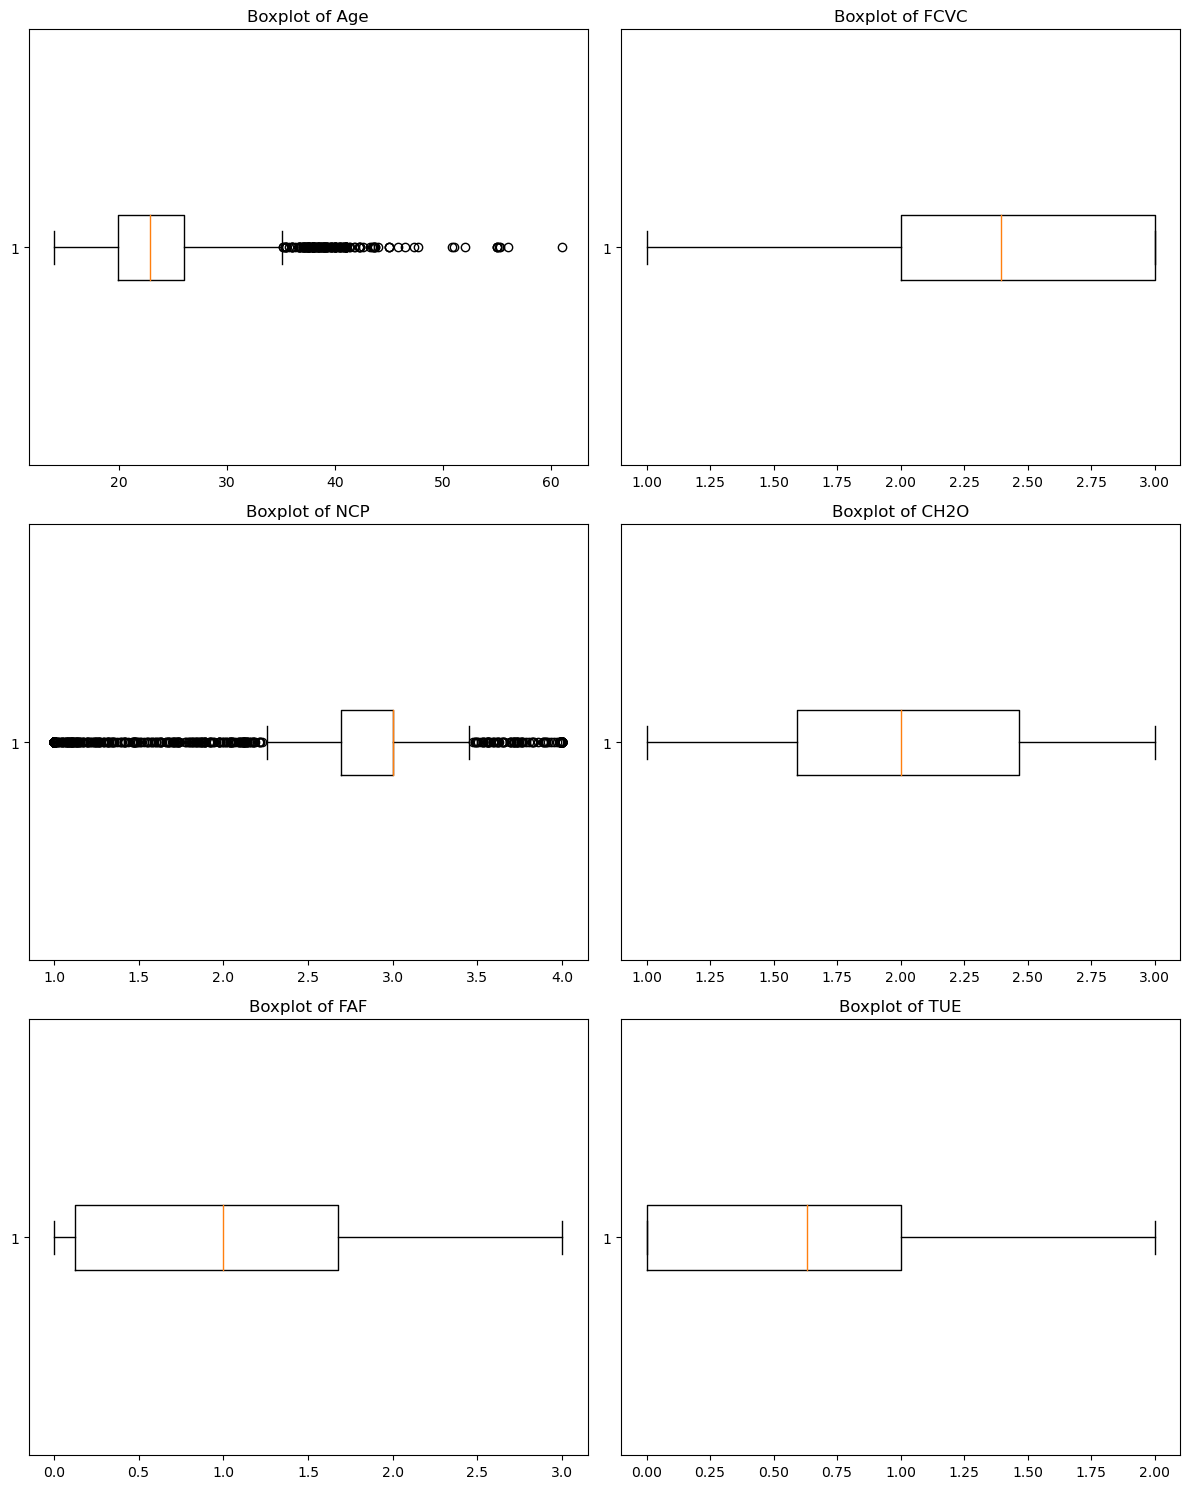

In [31]:
plt.figure(figsize=(12, 15)) 

# Boxplot for Age
plt.subplot(3, 2, 1)
plt.boxplot(data['Age'], vert=False)
plt.title('Boxplot of Age')

# Boxplot for FCVC
plt.subplot(3, 2, 2)
plt.boxplot(data['FCVC'], vert=False)
plt.title('Boxplot of FCVC')

# Boxplot for NCP
plt.subplot(3, 2, 3)
plt.boxplot(data['NCP'], vert=False)
plt.title('Boxplot of NCP')

# Boxplot for CH2O
plt.subplot(3, 2, 4)
plt.boxplot(data['CH2O'], vert=False)
plt.title('Boxplot of CH2O')

# Boxplot for FAF
plt.subplot(3, 2, 5)
plt.boxplot(data['FAF'], vert=False)
plt.title('Boxplot of FAF')

# Boxplot for TUE
plt.subplot(3, 2, 6)
plt.boxplot(data['TUE'], vert=False)
plt.title('Boxplot of TUE')

# Display the boxplots
plt.tight_layout()
plt.show()


##### Identifies and handles outliers in numerical columns of a dataset

In [32]:
for cols in data.columns:            
    if data[cols].dtype == object :       # Selecting only numerical column
        continue
    else:
        Q1 = data[cols].quantile(q=0.25)
        Q3 = data[cols].quantile(q=0.75)
        iqr = Q3-Q1
        
        low = Q1 - 1.5*(Q3-Q1)          
        high = Q3 + 1.5*(Q3-Q1)
        data.loc[(data[cols]<low) | (data[cols]>high),cols] = data[cols].median()   
        # Replacing outliers with median

##### Countplot for categorical attributes

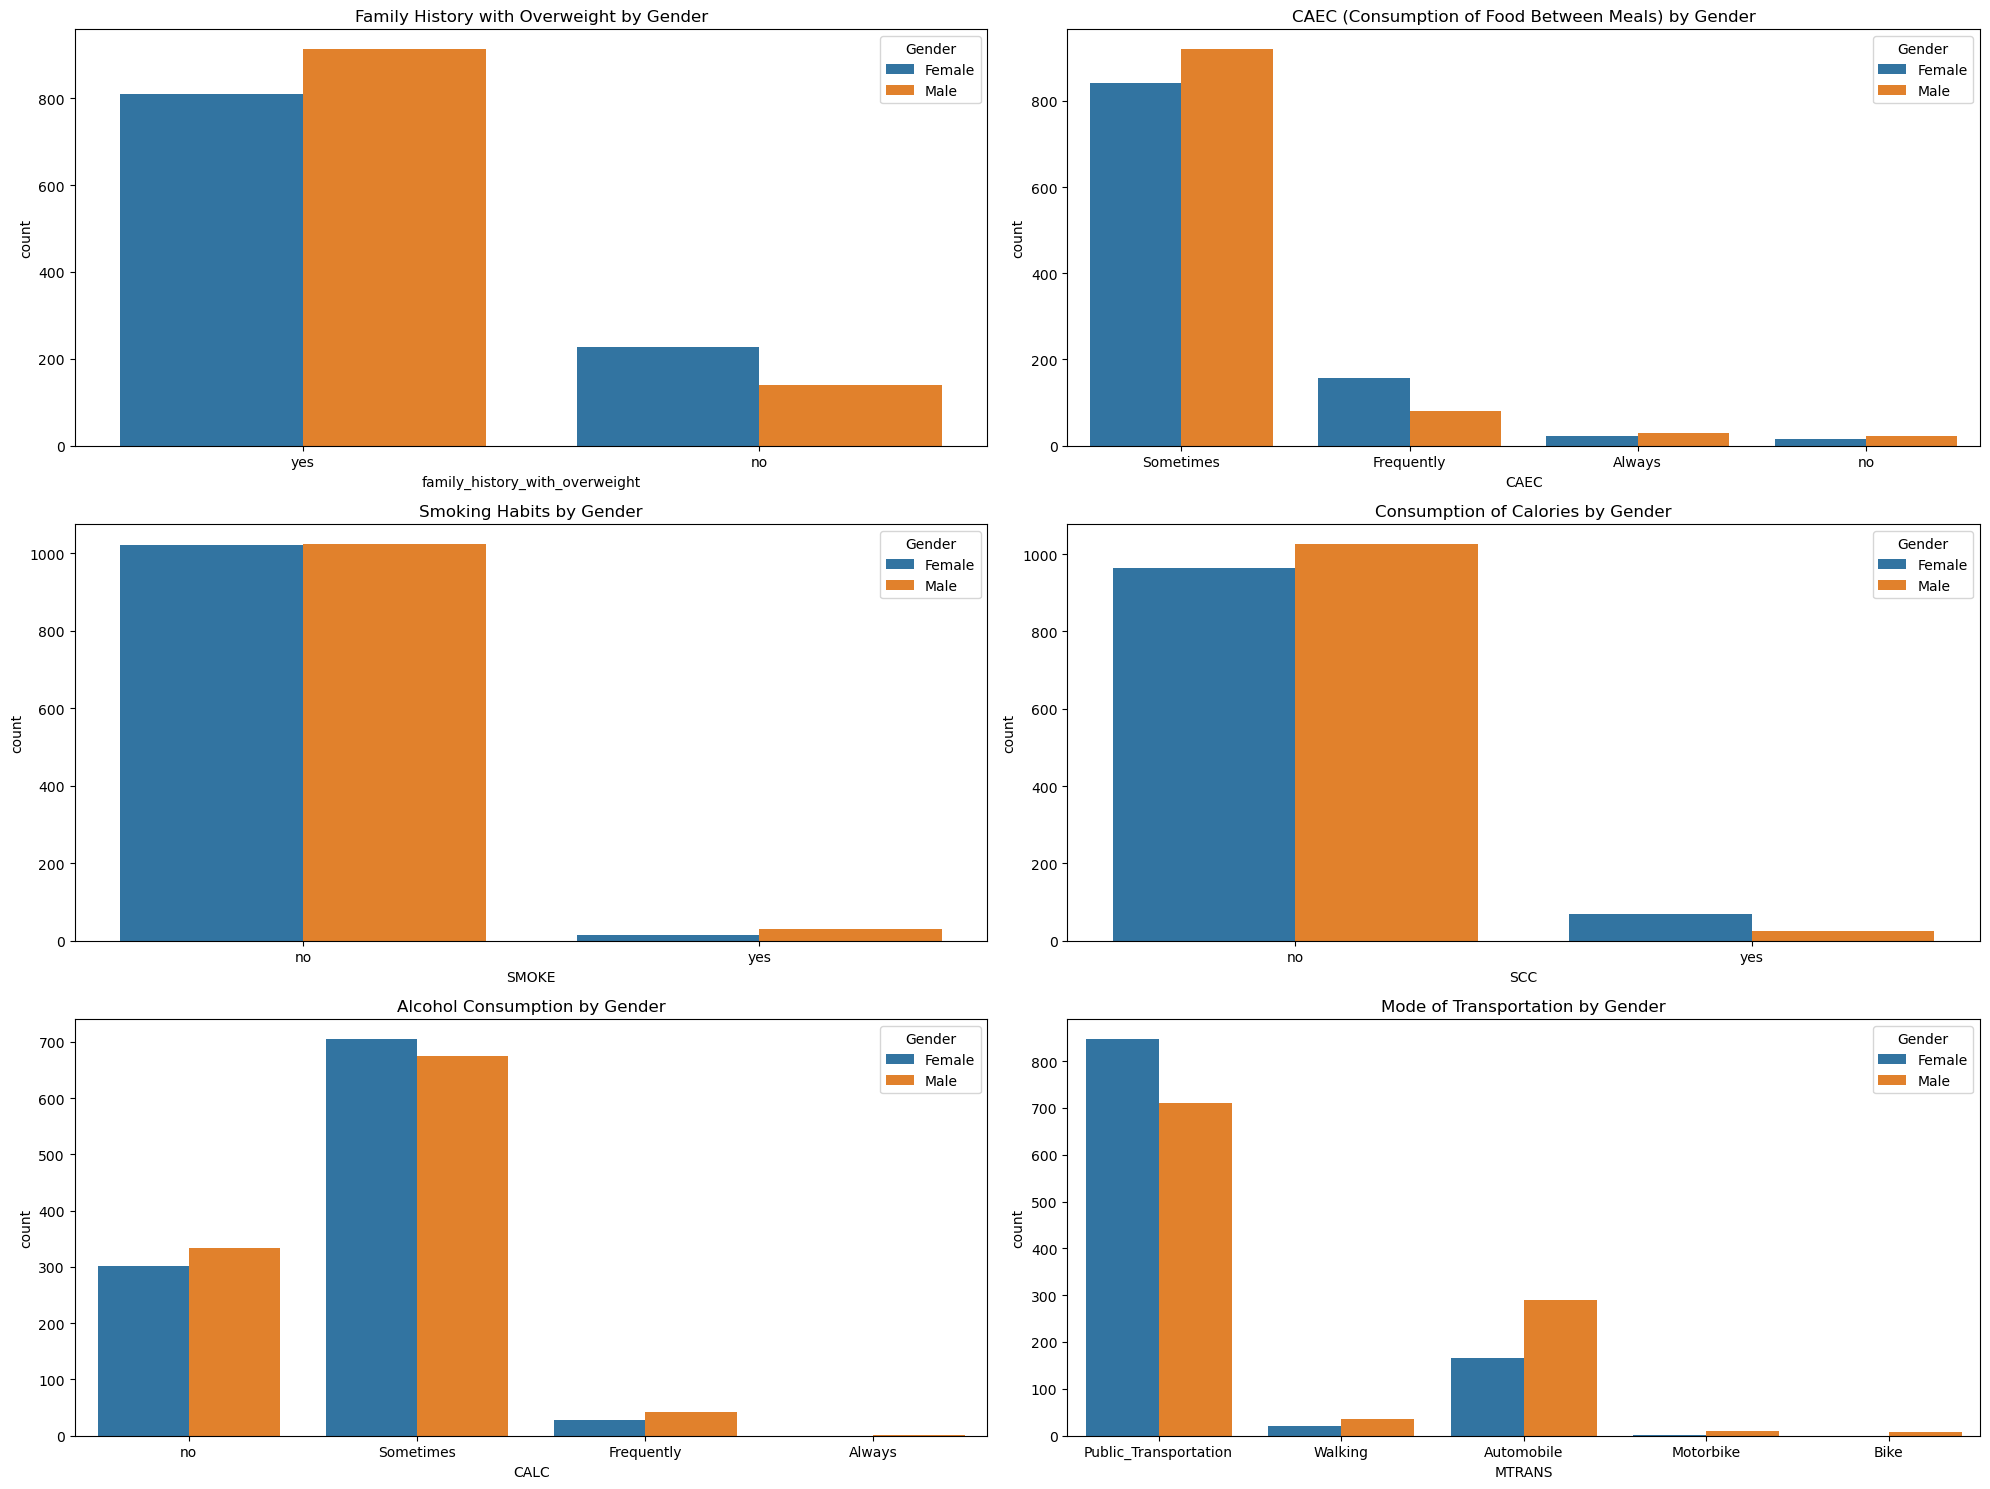

In [33]:

plt.figure(figsize=(20, 15))

# Plot 1: Family History with Overweight
plt.subplot(3, 2, 1)
sns.countplot(data=data, x='family_history_with_overweight', hue='Gender')
plt.title('Family History with Overweight by Gender')

# Plot 2: CAEC
plt.subplot(3, 2, 2)
sns.countplot(data=data, x='CAEC', hue='Gender')
plt.title('CAEC (Consumption of Food Between Meals) by Gender')

# Plot 3: SMOKE
plt.subplot(3, 2, 3)
sns.countplot(data=data, x='SMOKE', hue='Gender')
plt.title('Smoking Habits by Gender')

# Plot 4: SCC
plt.subplot(3, 2, 4)
sns.countplot(data=data, x='SCC', hue='Gender')
plt.title('Consumption of Calories by Gender')

# Plot 5: CALC
plt.subplot(3, 2, 5)
sns.countplot(data=data, x='CALC', hue='Gender')
plt.title('Alcohol Consumption by Gender')

# Plot 6: MTRANS
plt.subplot(3, 2, 6)
sns.countplot(data=data, x='MTRANS', hue='Gender')
plt.title('Mode of Transportation by Gender')

# Show the plots
plt.tight_layout()
plt.show()


Converts the 'Gender' column values into binary format, mapping 'Male' to 1 and 'Female' to 0 and converts the 'yes'/'no' values in the specified columns to binary format, mapping 'yes' to 1 and 'no' to 0 for each column in the yes_no_columns list.

In [34]:
data['Gender'], c =pd.factorize(data['Gender'])
data['family_history_with_overweight'], c = pd.factorize(data['family_history_with_overweight'])
data['FAVC'], c = pd.factorize(data['FAVC'])
data['SMOKE'], c = pd.factorize(data['SMOKE'])
data['SCC'], c = pd.factorize(data['SCC'])

Creates dummy/one-hot encoded columns for the categorical variables in multi_class_columns, replacing the original columns with binary indicator columns.

In [35]:
def dummies(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data

In [36]:
le = LabelEncoder()
data['NObeyesdad'] = le.fit_transform(data['NObeyesdad'])
data['CAEC'] = le.fit_transform(data['CAEC'])
data['CALC'] = le.fit_transform(data['CALC'])
data['MTRANS'] = le.fit_transform(data['MTRANS'])

In [37]:
data.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               0     0   2.0   
1       0  21.0    1.52    56.0                               0     0   3.0   
2       1  23.0    1.80    77.0                               0     0   2.0   
3       1  27.0    1.80    87.0                               1     0   3.0   
4       1  22.0    1.78    89.8                               1     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  3.0     2      0   2.0    0  0.0  0.0     2       3           6

In [38]:
data.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int32
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int32
MTRANS                              int32
NObeyesdad                          int32
dtype: object

In [39]:
from scipy.stats import skew
print(f"Skewness of Weight: {skew(data['Weight'])}")
print(f"Skewness of Height: {skew(data['Height'])}")


Skewness of Weight: 0.2313715835307383
Skewness of Height: -0.03329850575179677


Weight (0.2155): This value is close to 0, No transformation is needed.

Height (-0.0396): This is very close to 0, meaning the height data is almost perfectly symmetrical. No transformation is needed.

##### Apply Min-Max scaling to the continuous variables

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of continuous variables
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


data[continuous_vars] = scaler.fit_transform(data[continuous_vars])




In [41]:
# Display the transformed data
print("Data after Min-Max Scaling:")
data[continuous_vars].head()

Data after Min-Max Scaling:


Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE
0  0.331355  0.323401  0.198323   0.5  0.621729   0.5  0.000000  0.5
1  0.331355  0.133165  0.134859   1.0  0.621729   1.0  1.000000  0.0
2  0.426027  0.665826  0.301450   0.5  0.621729   0.5  0.666667  0.5
3  0.615373  0.665826  0.380779   1.0  0.621729   0.5  0.666667  0.0
4  0.378691  0.627779  0.402991   0.5  0.621729   0.5  0.000000  0.0

##### Create histograms for each continuous variable after normalization

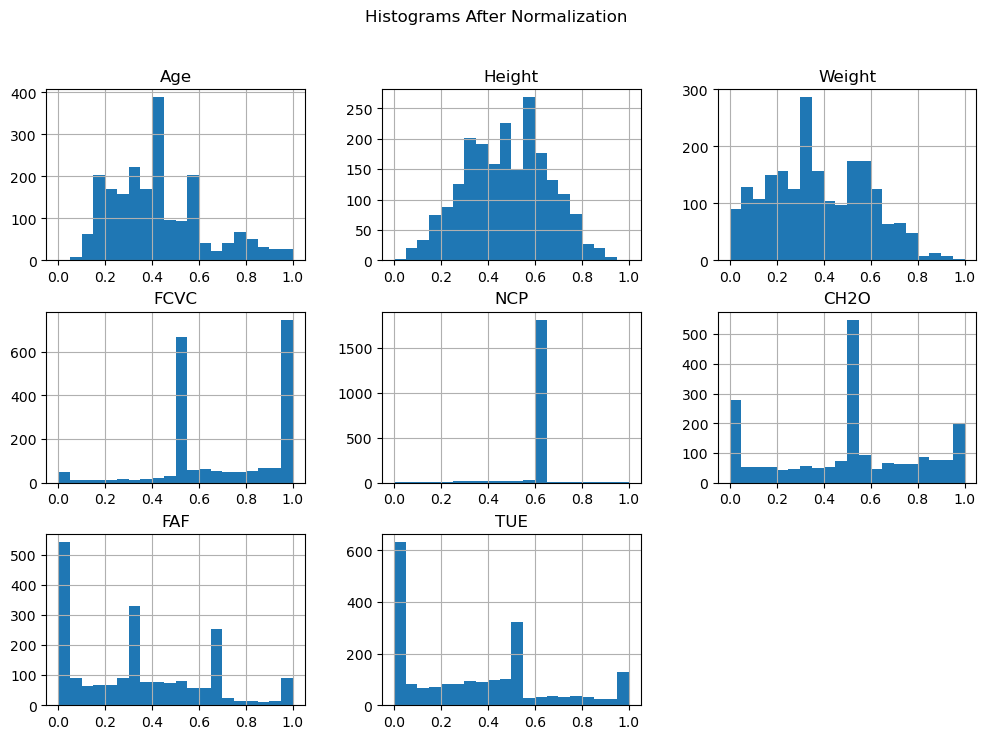

In [42]:
data[continuous_vars].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms After Normalization')
plt.show()

In [43]:
data.describe()

Gender          Age       Height       Weight  \
count  2087.000000  2087.000000  2087.000000  2087.000000   
mean      0.504073     0.424484     0.480423     0.379317   
std       0.500103     0.196579     0.176896     0.207231   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.280039     0.342764     0.214188   
50%       1.000000     0.418814     0.478603     0.349850   
75%       1.000000     0.546268     0.607625     0.547420   
max       1.000000     1.000000     1.000000     1.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2087.000000  2087.000000  2087.000000  2087.000000   
mean                         0.174892     0.883565     0.710733     0.602334   
std                          0.379966     0.320823     0.267368     0.105492   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          0.000000     1.000000     0.500000     0.621729   
50%                          0.000000     1.000000     0.698133     0.621729   
75%                          0.000000     1.000000     1.000000     0.621729   
max                          1.000000     1.000000     1.000000     1.000000   

              CAEC        SMOKE         CH2O          SCC          FAF  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean      1.853857     0.021083     0.502375     0.045999     0.337604   
std       0.459494     0.143695     0.304142     0.209533     0.284492   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.295461     0.000000     0.041502   
50%       2.000000     0.000000     0.500000     0.000000     0.333333   
75%       2.000000     0.000000     0.733096     0.000000     0.559367   
max       3.000000     1.000000     1.000000     1.000000     1.000000   

               TUE         CALC       MTRANS   NObeyesdad  
count  2087.000000  2087.000000  2087.000000  2087.000000  
mean      0.331518     2.270244     2.358888     3.014375  
std       0.304077     0.517008     1.265402     1.948470  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     2.000000     3.000000     1.000000  
50%       0.315433     2.000000     3.000000     3.000000  
75%       0.500000     3.000000     3.000000     5.000000  
max       1.000000     3.000000     4.000000     6.000000

##### Plot histogram with KDE overlay

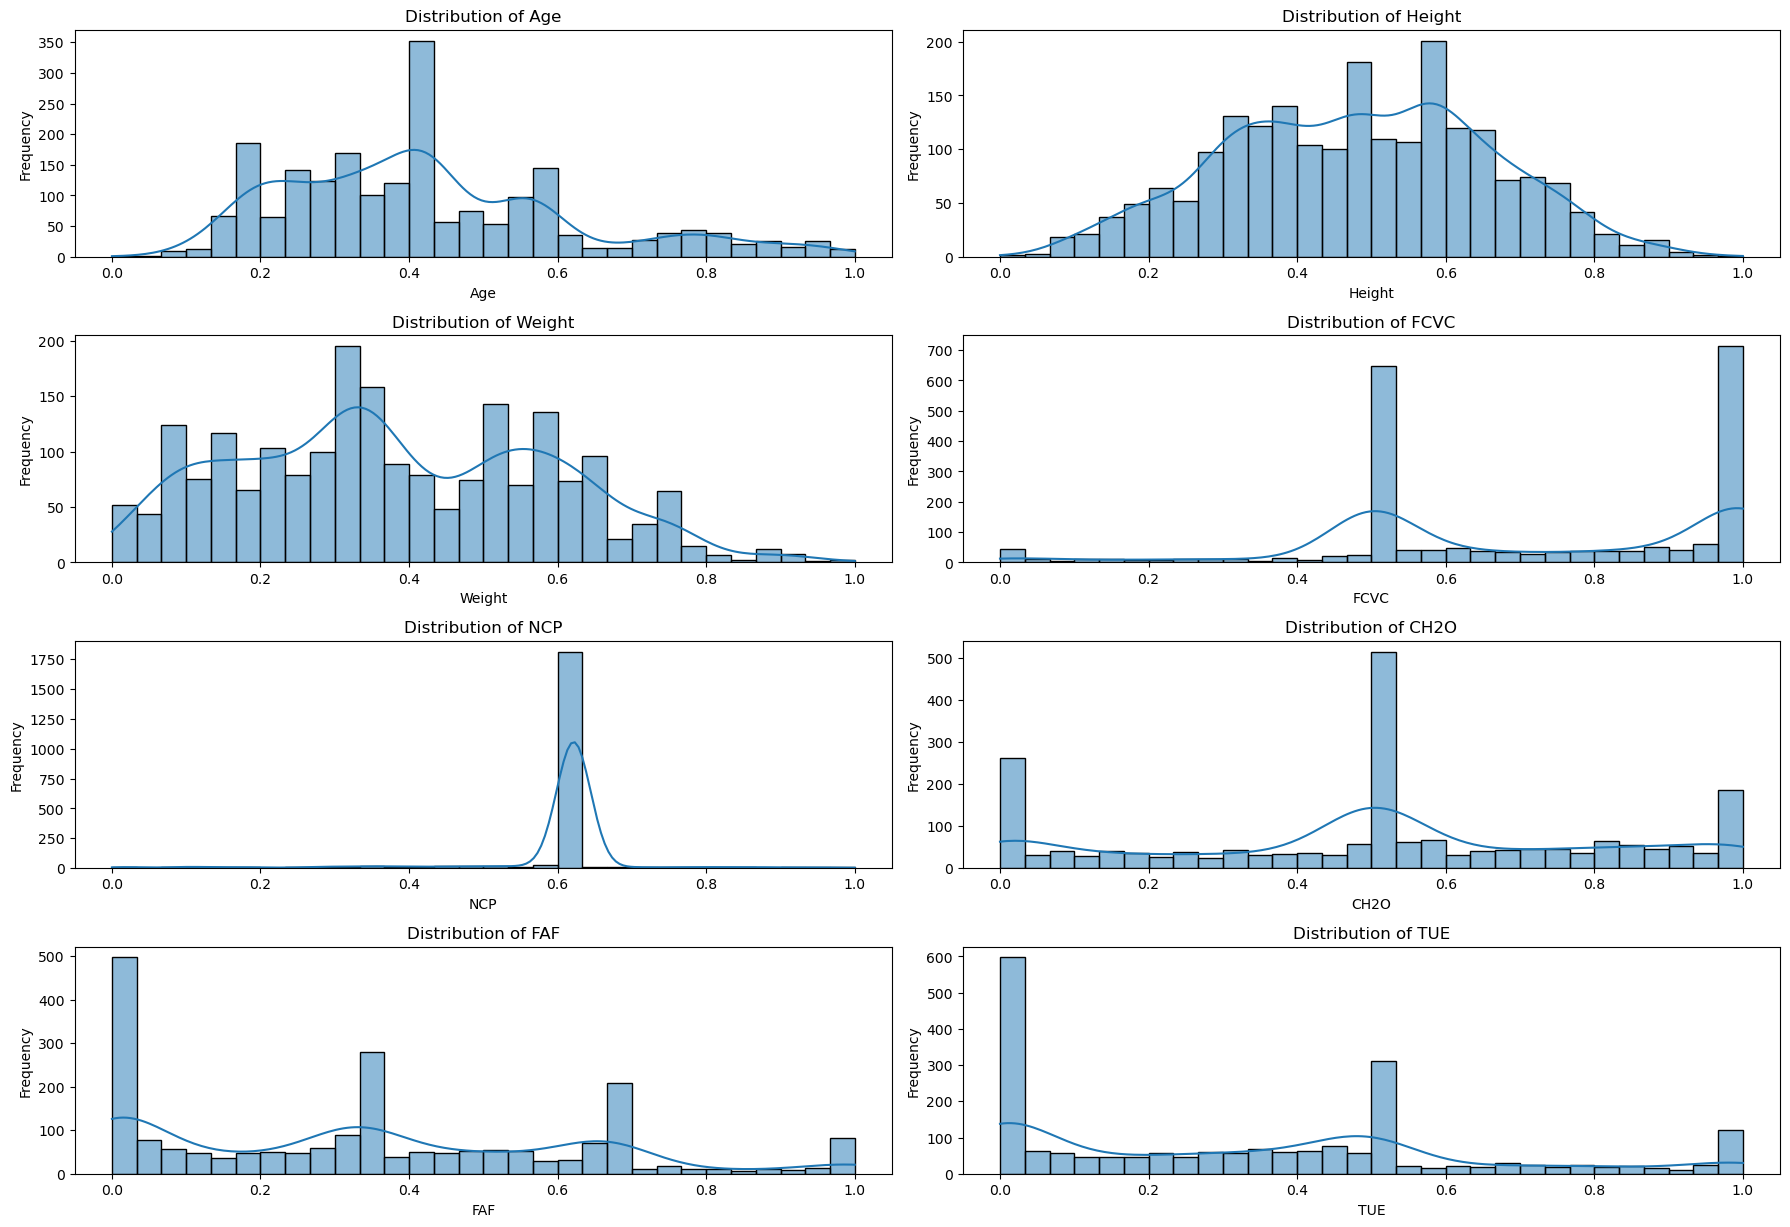

In [44]:
plt.figure(figsize=(18, 15))

# Loop through each variable and create a histogram with KDE
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(len(continuous_vars) // 2 + 1, 2, i)  
    sns.histplot(data[col], kde=True, bins=30)  
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout for better display
plt.tight_layout()
plt.show()


##### Distribution Exploration

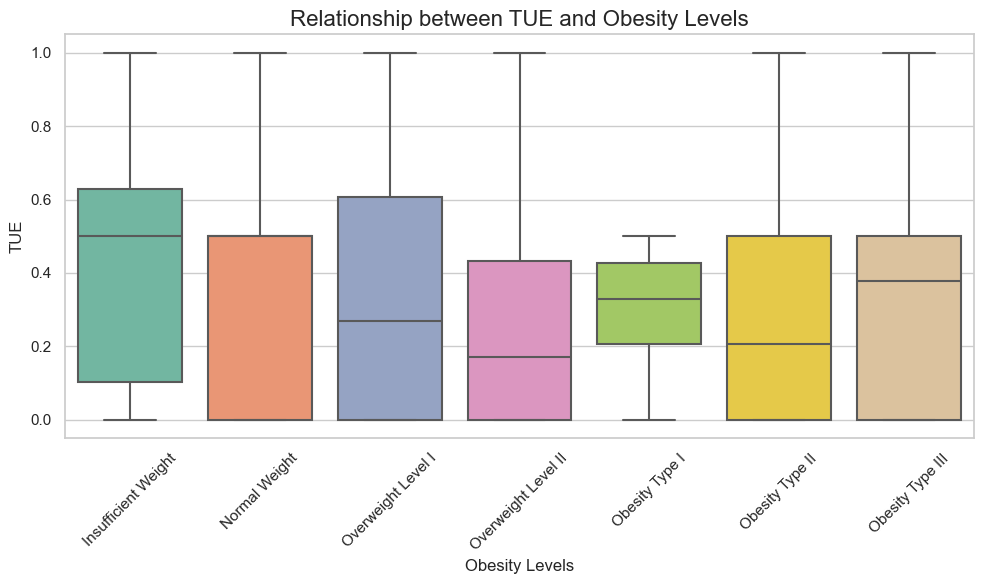

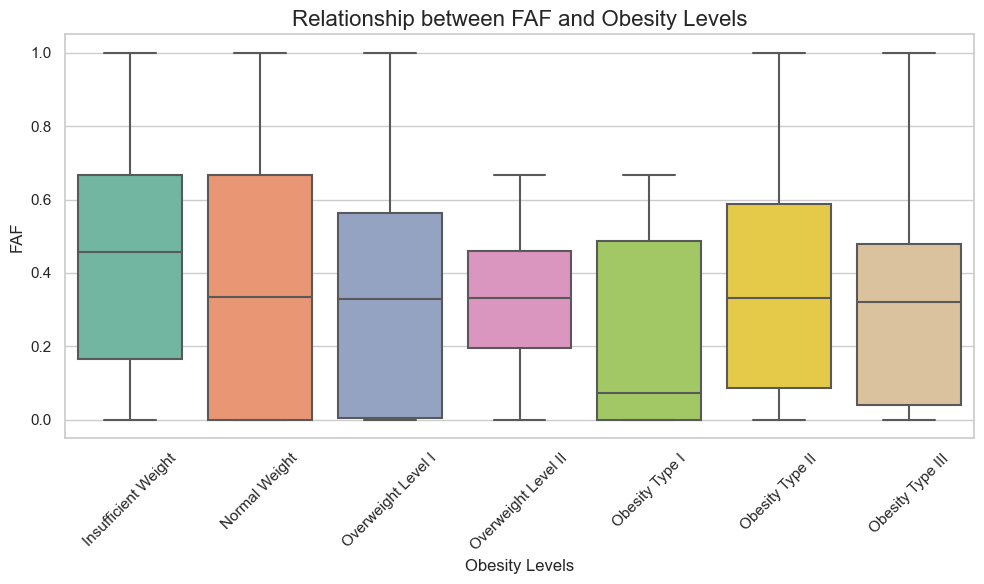

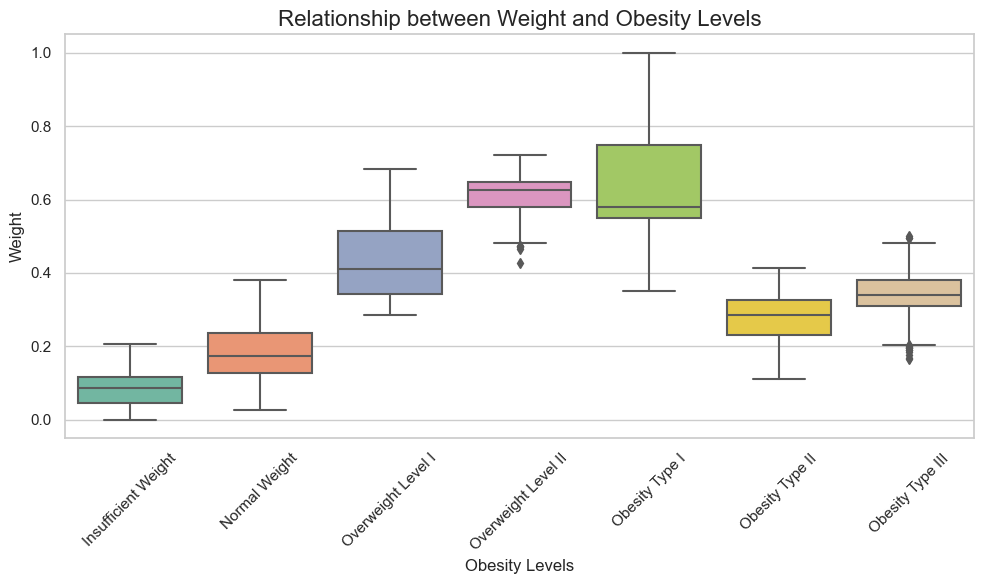

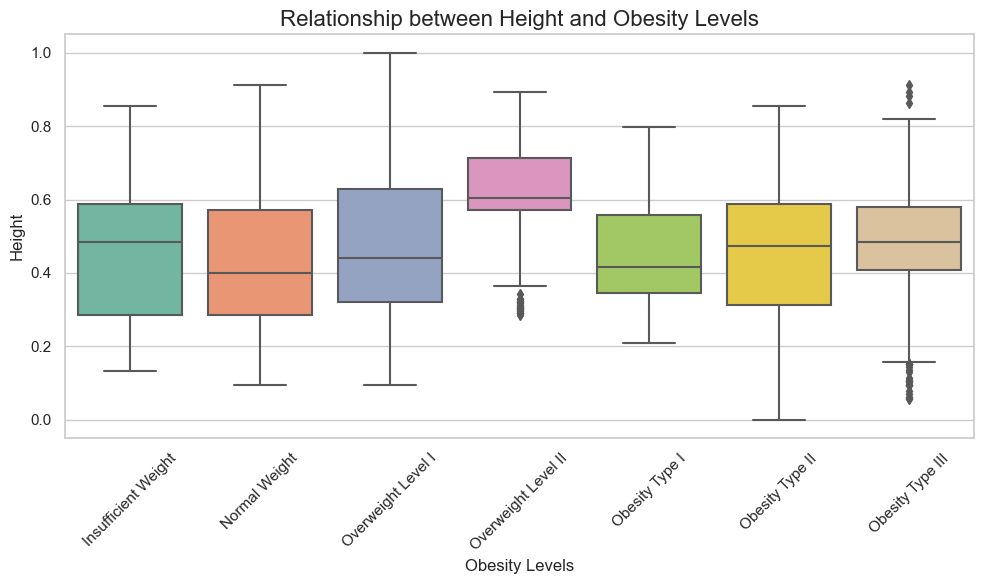

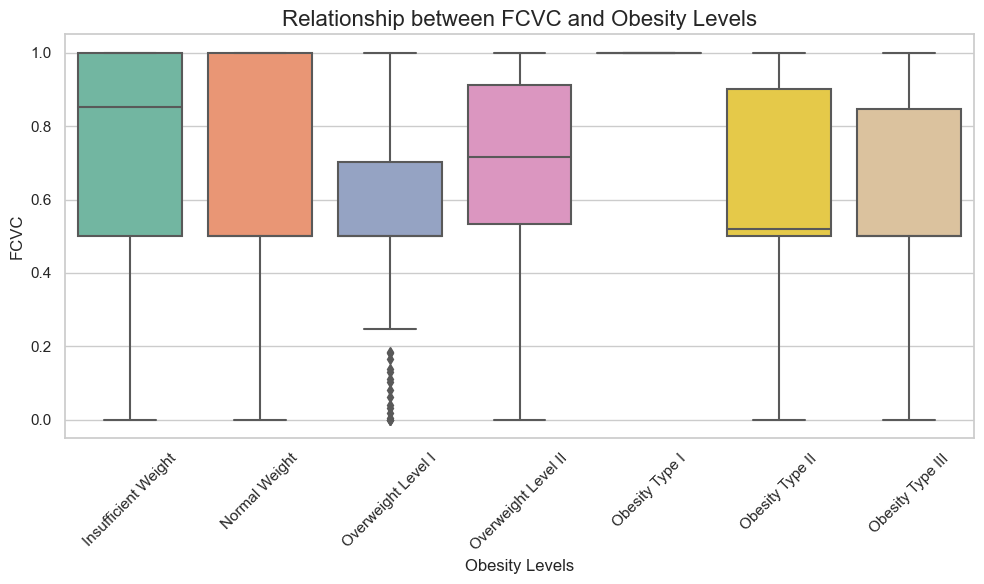

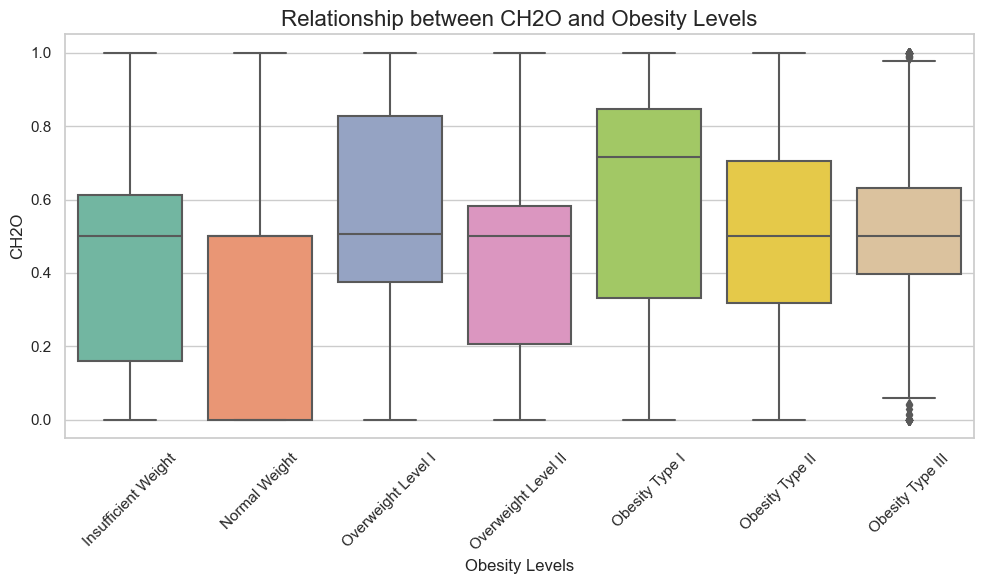

In [45]:

# Set plot style
sns.set(style="whitegrid")

# Features to explore
features = ['TUE', 'FAF','Weight','Height','FCVC','CH2O',]  

# Loop through each feature to create boxplots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['NObeyesdad'], y=data[feature], palette='Set2')
    plt.title(f'Relationship between {feature} and Obesity Levels', fontsize=16)
    plt.xlabel('Obesity Levels', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(ticks=range(len(data['NObeyesdad'].unique())), 
               labels=[
                   'Insufficient Weight', 'Normal Weight', 'Overweight Level I', 
                   'Overweight Level II', 'Obesity Type I', 
                   'Obesity Type II', 'Obesity Type III'
               ], rotation=45)
    plt.tight_layout()
    plt.show()


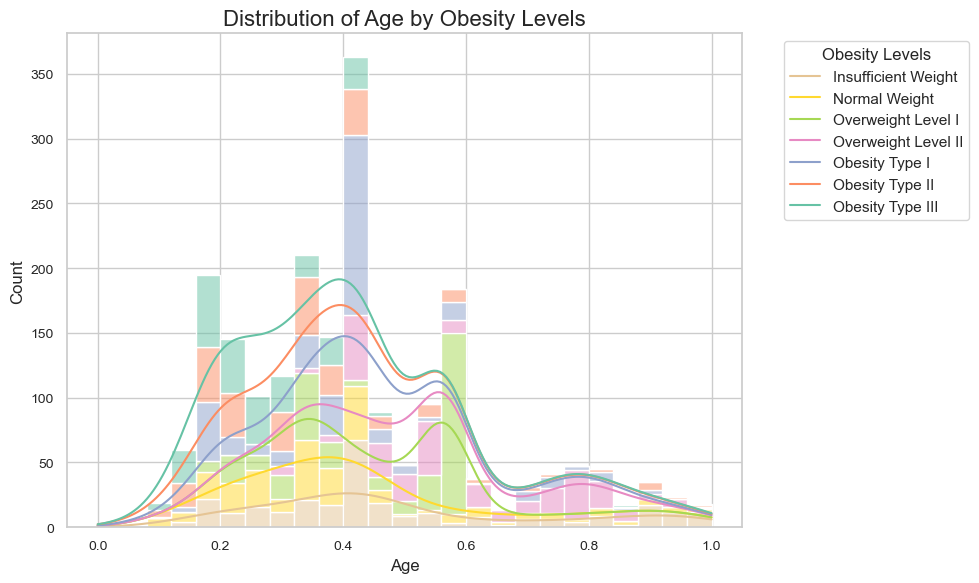

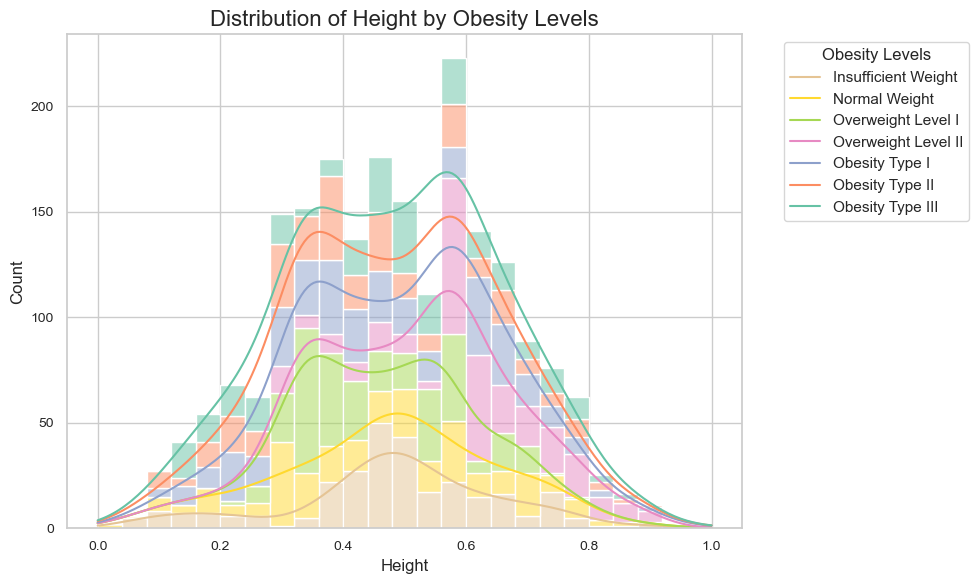

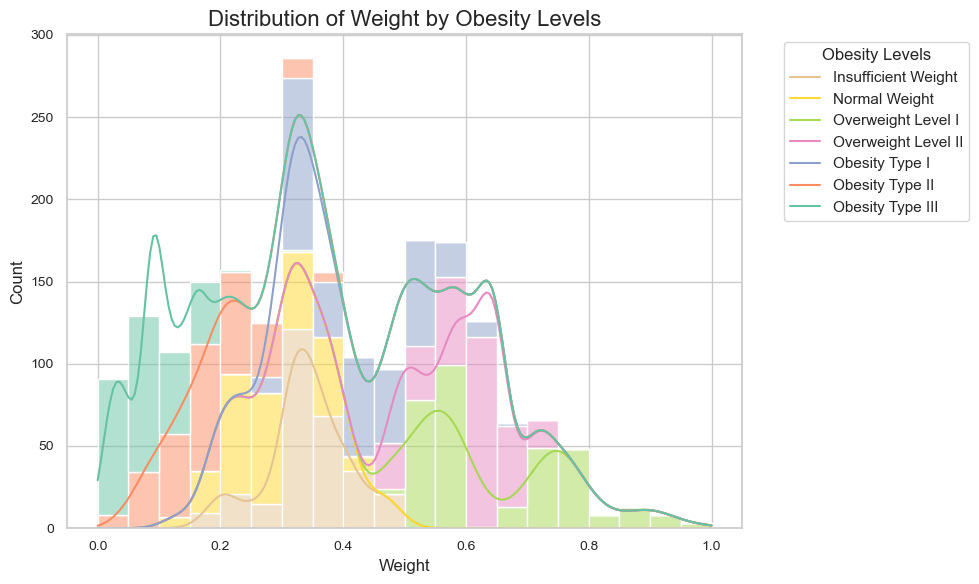

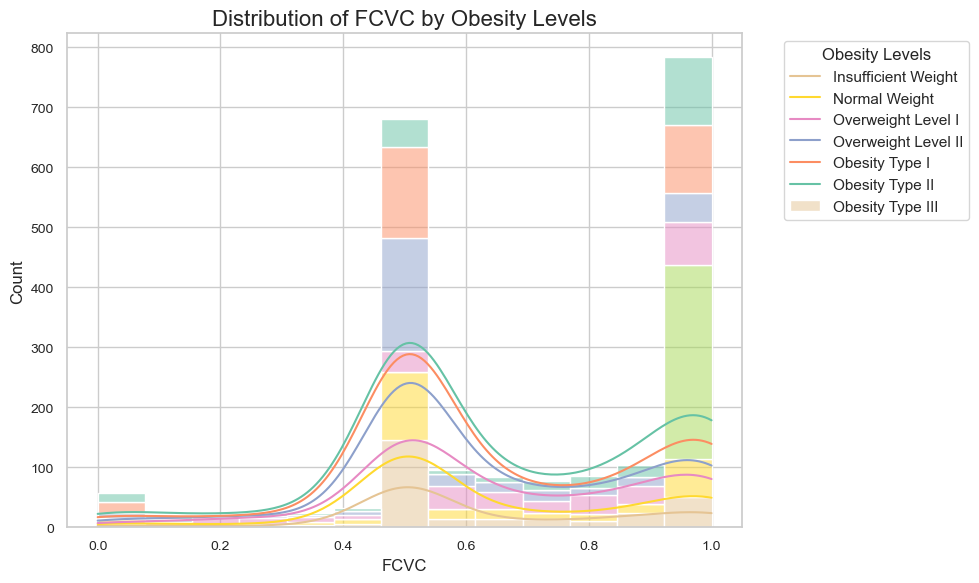

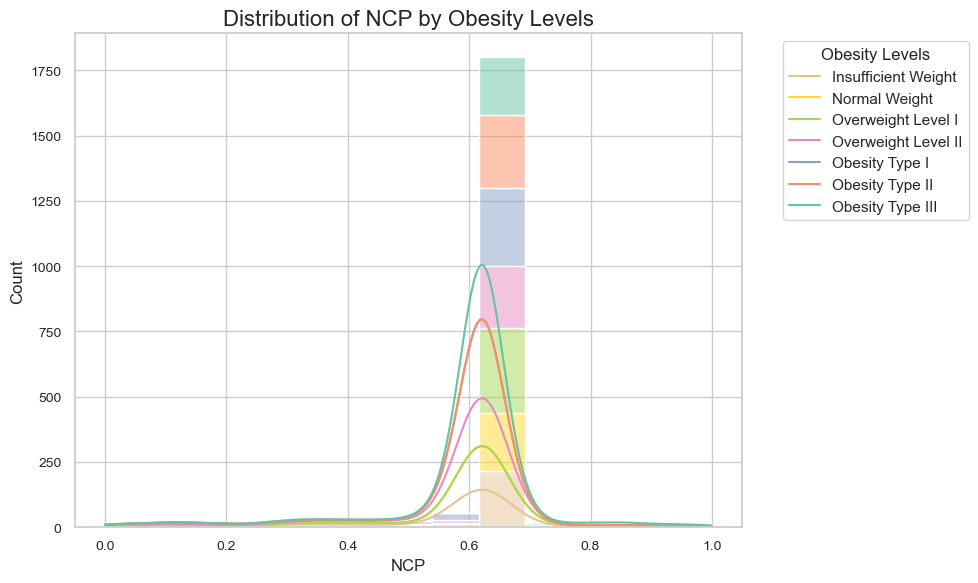

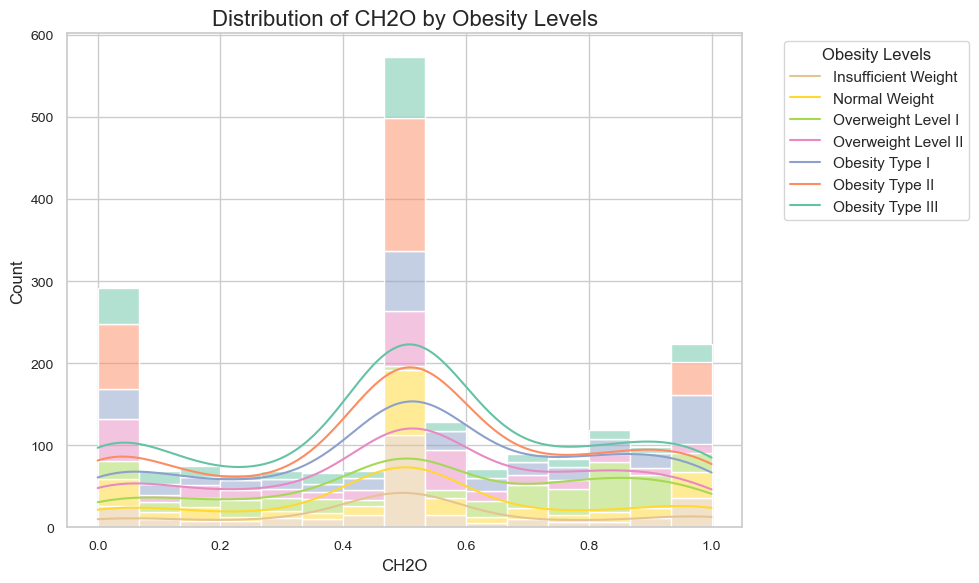

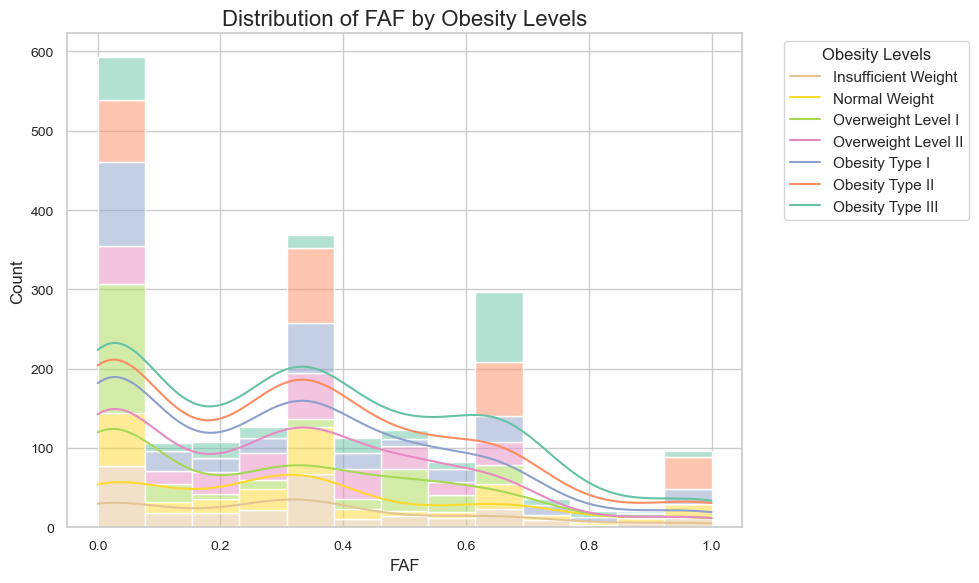

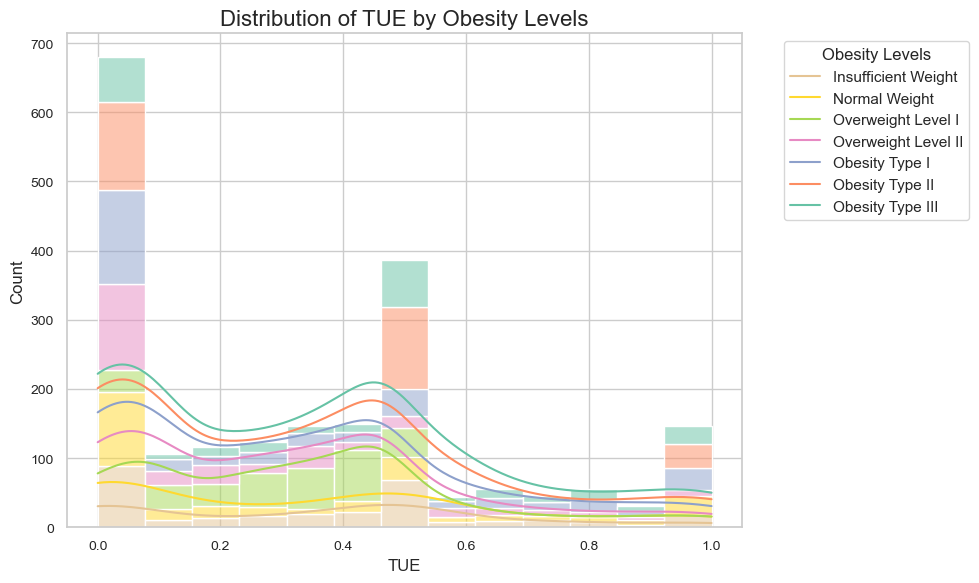

In [46]:

# Set plot style
sns.set(style="whitegrid")


# Loop through each feature to create histograms with KDE overlays
for feature in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=data,
        x=feature,
        hue='NObeyesdad',
        kde=True,
        palette='Set2',
        multiple='stack'
    )
    plt.title(f'Distribution of {feature} by Obesity Levels', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(
        title="Obesity Levels",
        labels=[
            'Insufficient Weight', 'Normal Weight', 'Overweight Level I', 
            'Overweight Level II', 'Obesity Type I', 
            'Obesity Type II', 'Obesity Type III'
        ],
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    plt.tight_layout()
    plt.show()


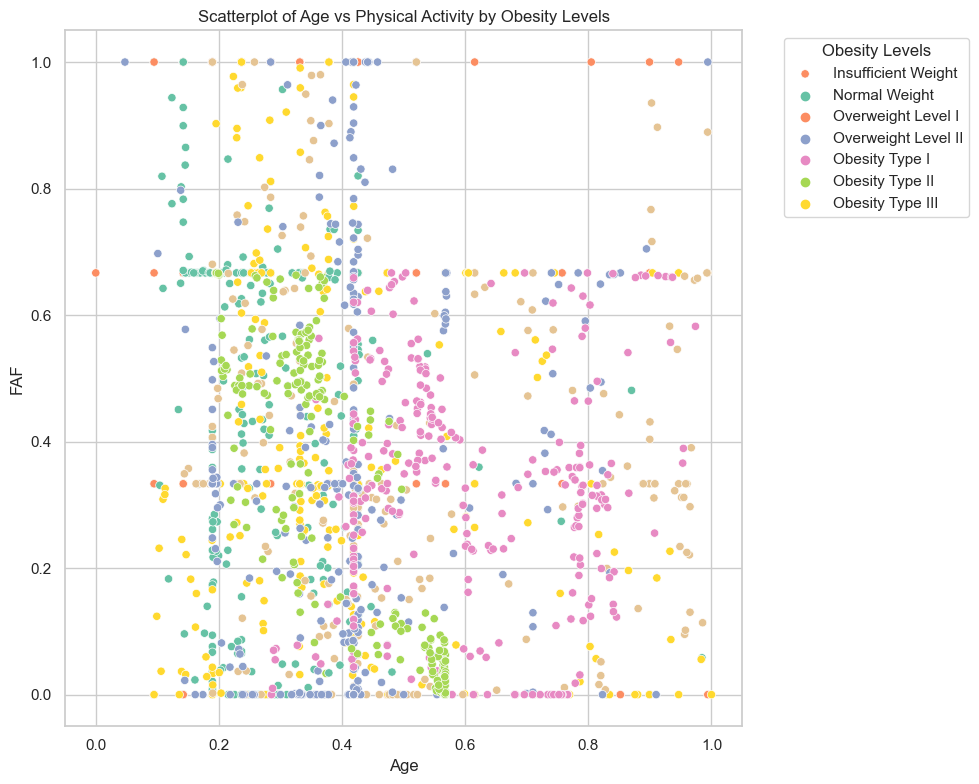

In [47]:
# Set plot style
sns.set(style="whitegrid")


plt.figure(figsize=(10, 8))

# Create scatter plot with hue as 'NObeyesdad'
sns.scatterplot(x='Age', y='FAF', data=data, hue='NObeyesdad', palette='Set2')

# Set title and labels
plt.title('Scatterplot of Age vs Physical Activity by Obesity Levels')

# Define custom labels for the 'NObeyesdad' categories
labels = [
    'Insufficient Weight', 'Normal Weight', 'Overweight Level I',
    'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III'
]

# Adjust the legend
plt.legend(
    title="Obesity Levels", 
    labels=labels, 
    bbox_to_anchor=(1.05, 1),  
    loc='upper left'
)

# Show the plot
plt.tight_layout()
plt.show()


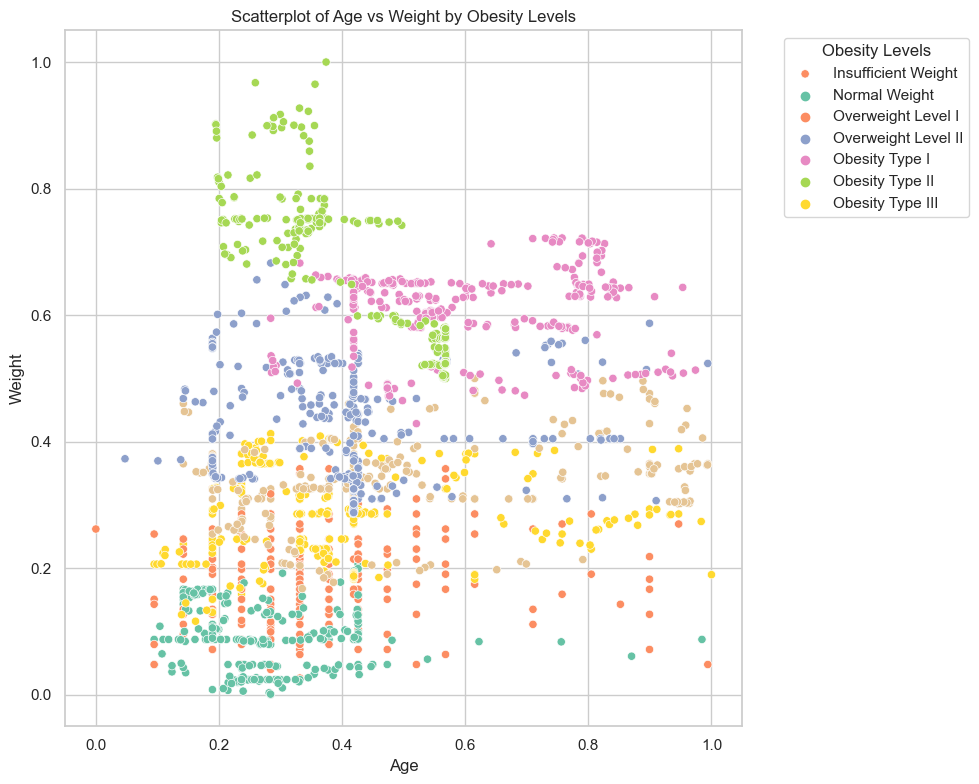

In [48]:

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

# Create scatter plot with hue as 'NObeyesdad'
sns.scatterplot(x='Age', y='Weight', data=data, hue='NObeyesdad', palette='Set2')

# Set title and labels
plt.title('Scatterplot of Age vs Weight by Obesity Levels')

# Define custom labels for the 'NObeyesdad' categories
labels = [
    'Insufficient Weight', 'Normal Weight', 'Overweight Level I',
    'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III'
]

# Adjust the legend to use the custom labels
plt.legend(
    title="Obesity Levels", 
    labels=labels, 
    bbox_to_anchor=(1.05, 1),  
    loc='upper left'
)

# Show the plot
plt.tight_layout()
plt.show()


##### Correlation Analysis

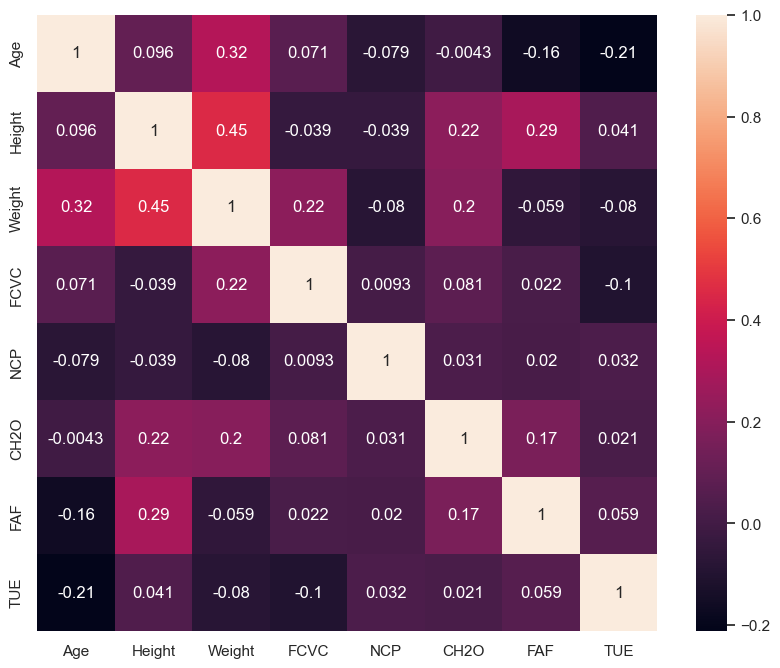

In [49]:
# Heatmap of correlation matrix
data_continuous = data[continuous_vars]

plt.figure(figsize=(10,8))
sns.heatmap(data_continuous.corr(), annot=True)
plt.show()

##### Advanced Visualizations

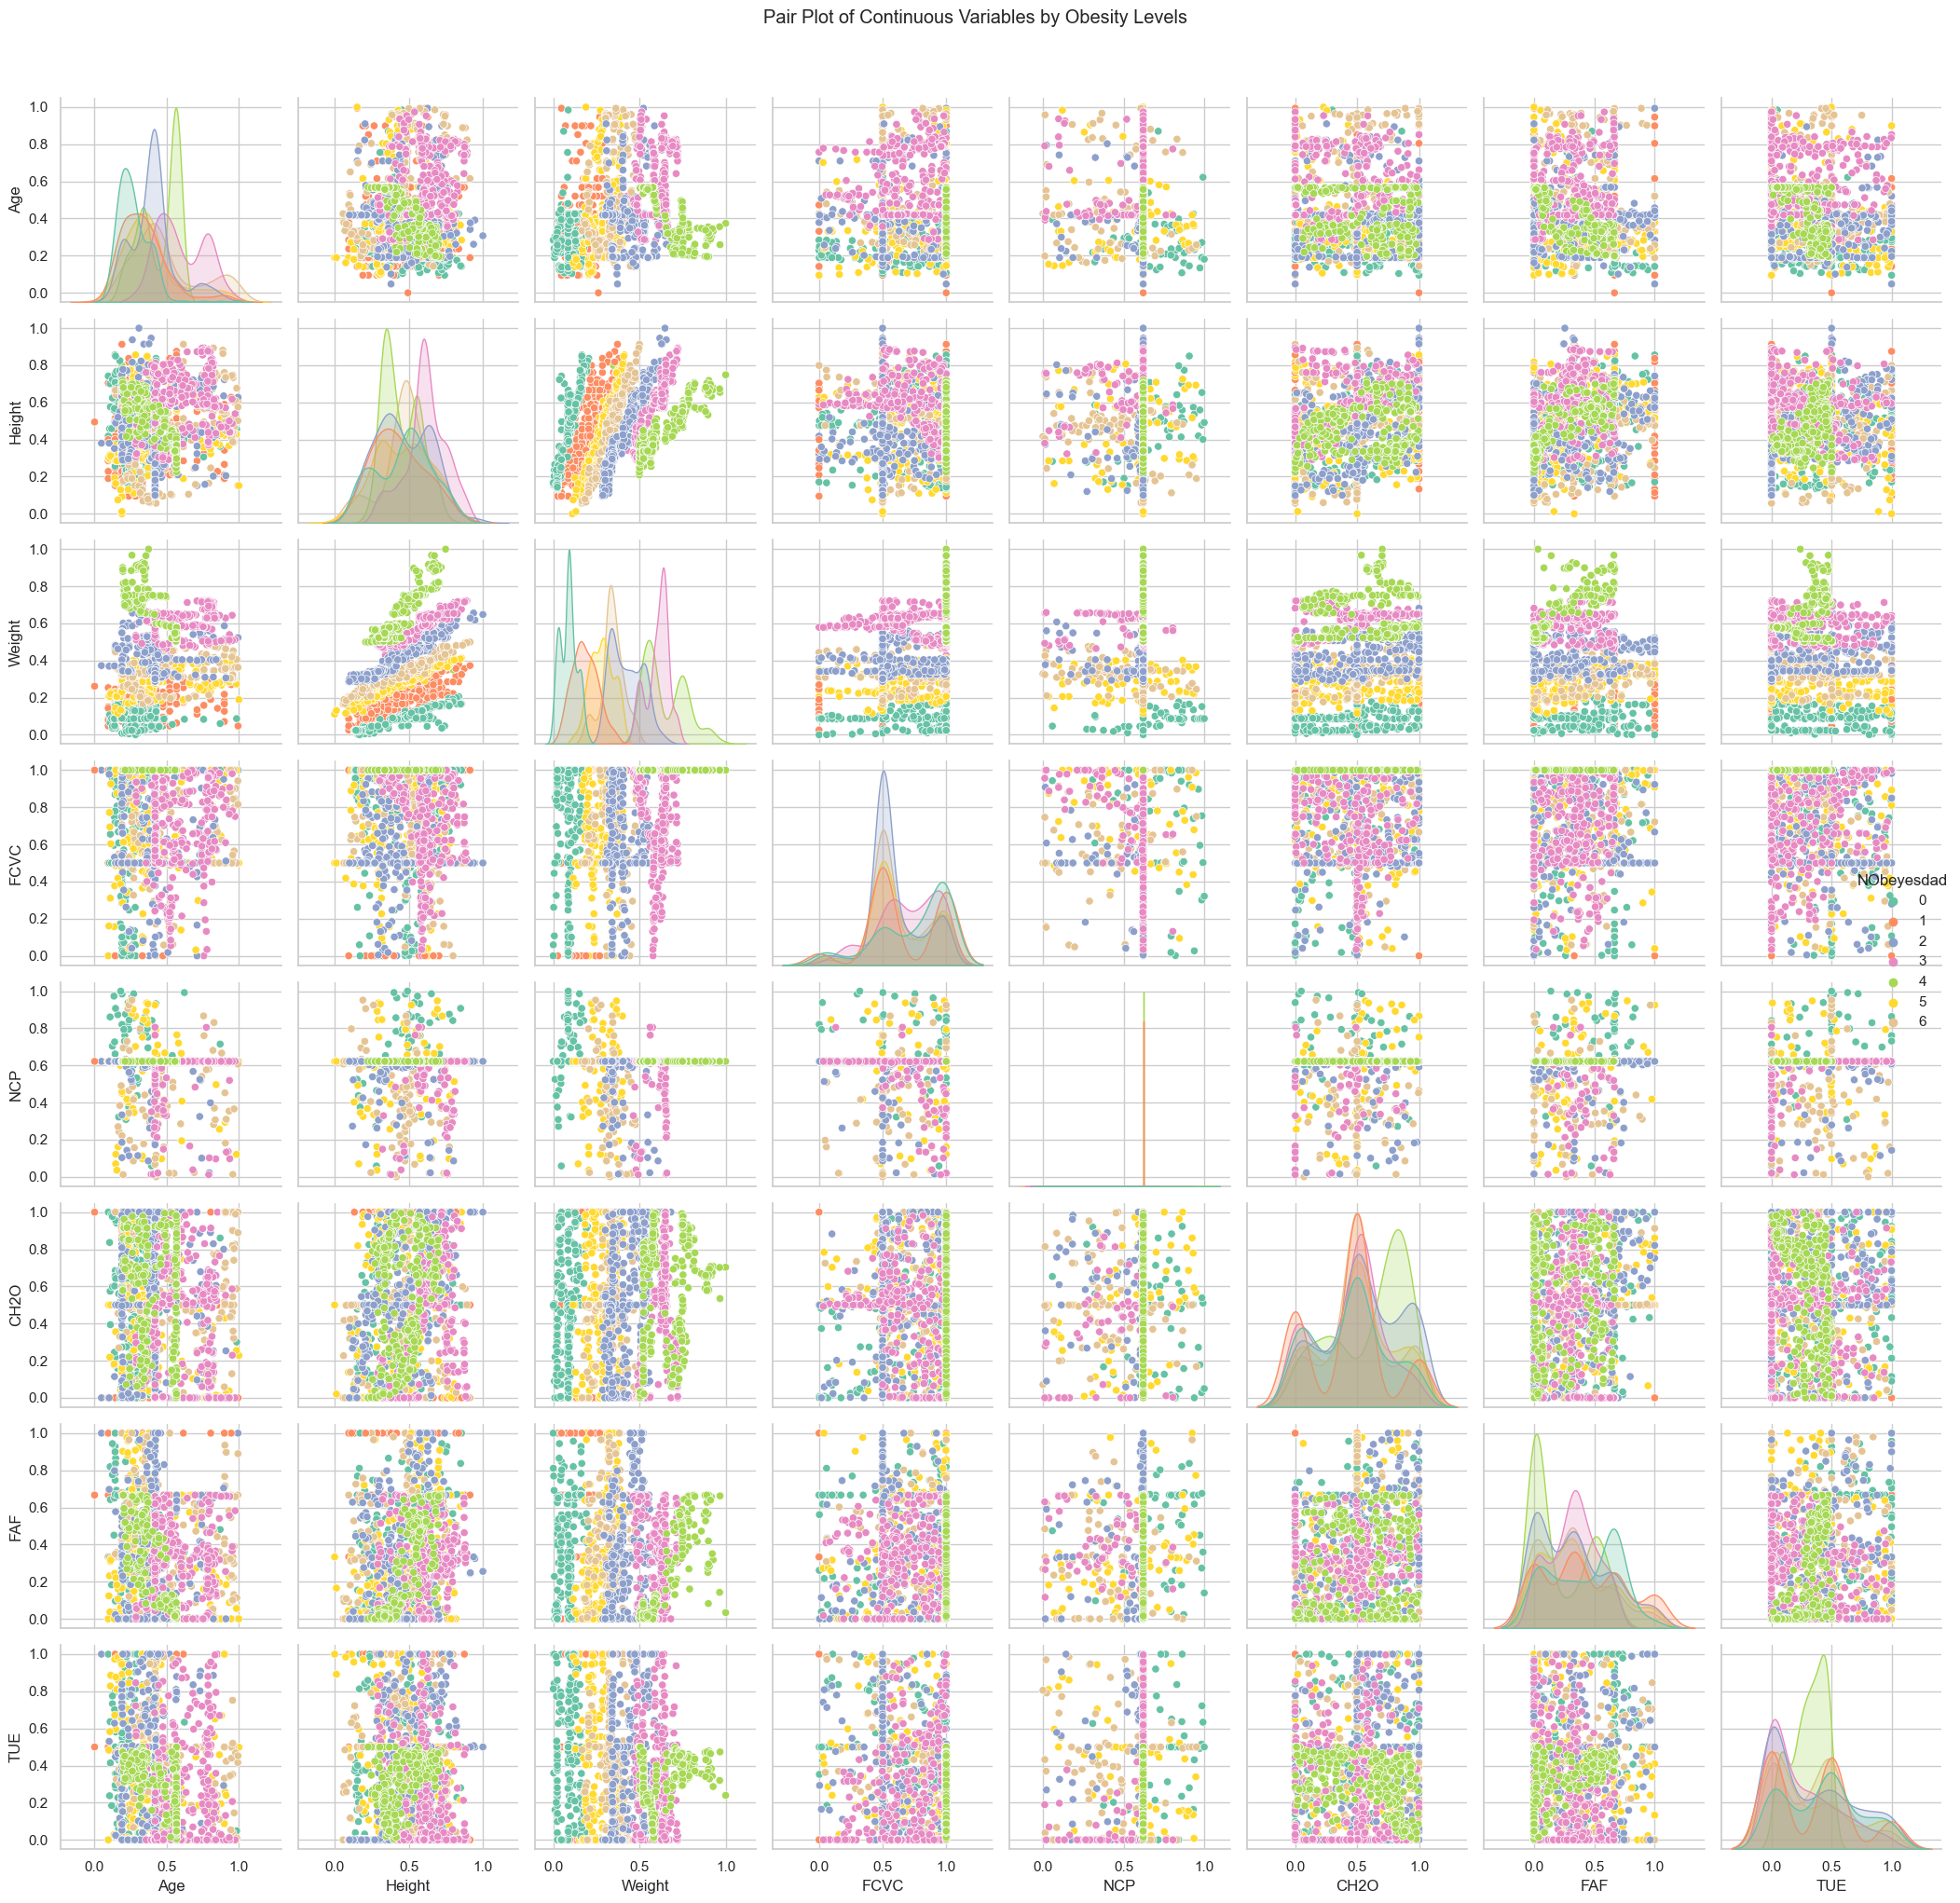

In [50]:
# Create pairplot with 'NObeyesdad' as hue
sns.pairplot(data, vars=continuous_vars, hue='NObeyesdad', palette='Set2', diag_kind='kde', markers='o')

plt.suptitle('Pair Plot of Continuous Variables by Obesity Levels', y=1.02)
plt.tight_layout()
plt.show()


#### Feature Engineering and Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# Display the first few rows of the scaled data
data.head()

Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0 -0.473866 -0.887864 -0.873605                               0     0   
1       0 -0.473866 -1.963531 -1.179922                               0     0   
2       1  0.007852  1.048338 -0.375838                               0     0   
3       1  0.971287  1.048338  0.007059                               1     0   
4       1 -0.233007  0.833204  0.114270                               1     0   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0 -0.788364  0.183899     2      0 -0.007810    0 -1.186977  0.554211     3   
1  1.082164  0.183899     2      1  1.636552    1  2.328908 -1.090505     2   
2 -0.788364  0.183899     2      0 -0.007810    0  1.156947  0.554211     1   
3  1.082164  0.183899     2      0 -0.007810    0  1.156947 -1.090505     1   
4 -0.788364  0.183899     2      0 -0.007810    0 -1.186977 -1.090505     2   

   MTRANS  NObeyesdad  
0       3           1  
1       3           1  
2       3           1  
3       4           5  
4       3           6

In [52]:
scaled_data = scaler.fit_transform(data[continuous_vars])

# Create a new DataFrame with the scaled data and retain the original column names
scaled = pd.DataFrame(scaled_data, columns=continuous_vars)


In [53]:
scaled.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.473866 -0.887864 -0.873605 -0.788364  0.183899 -0.007810 -1.186977   
1 -0.473866 -1.963531 -1.179922  1.082164  0.183899  1.636552  2.328908   
2  0.007852  1.048338 -0.375838 -0.788364  0.183899 -0.007810  1.156947   
3  0.971287  1.048338  0.007059  1.082164  0.183899 -0.007810  1.156947   
4 -0.233007  0.833204  0.114270 -0.788364  0.183899 -0.007810 -1.186977   

        TUE  
0  0.554211  
1 -1.090505  
2  0.554211  
3 -1.090505  
4 -1.090505

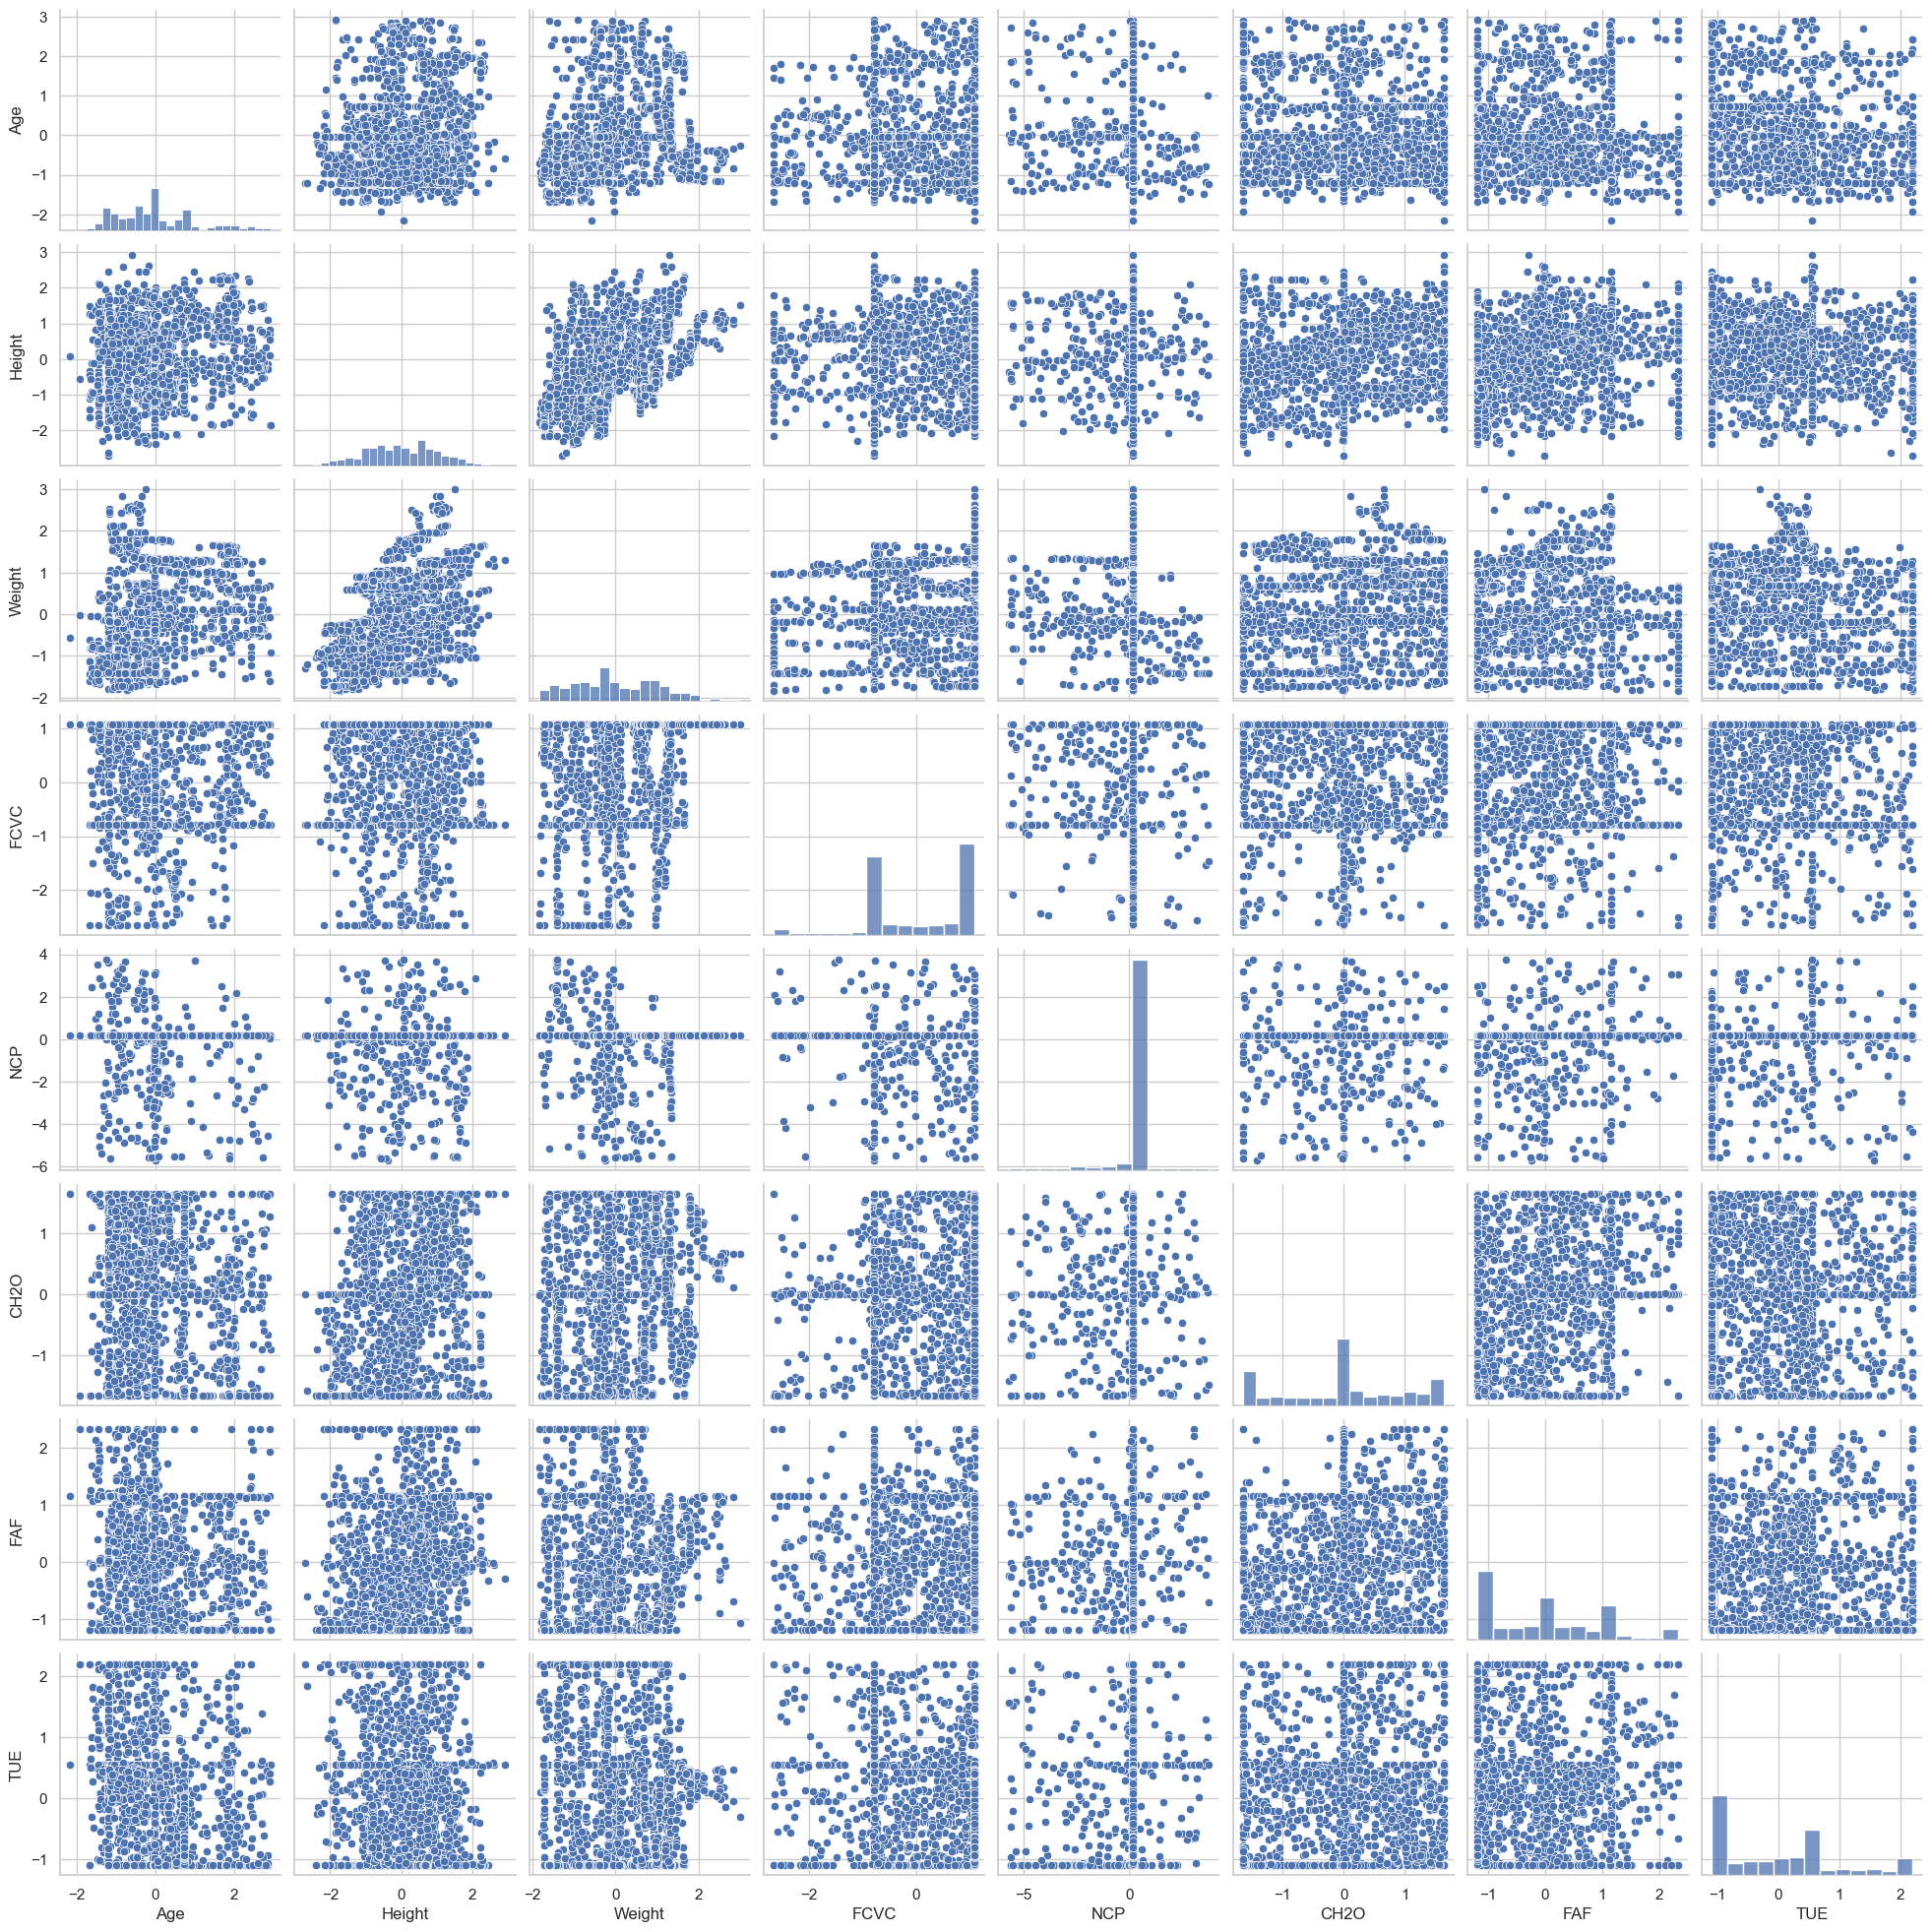

In [54]:
sns.pairplot(scaled)  # This will plot scatter plots for all pairs of continuous variables
plt.show()

## Model implementation

###### Now we will devide our dataframe into X and y.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [56]:
# X -> Independant features 
# y -> Target feature

In [57]:
X = data.iloc[:,:-1]
y = data['NObeyesdad']

In [58]:
l = ['Weight','Height','Gender','Age','CALC','FAVC','FCVC','CAEC','FAF','MTRANS','CH2O','TUE','SMOKE']
scaled_x = X[l]

In [59]:
# Randomly sampling dataset into train and test set 
train_X, test_X, train_y, test_y = train_test_split(scaled_x, y, test_size=0.2, random_state=40)

In [60]:
print('Shape of train_X is',train_X.shape)
print('Shape of train_y is',train_y.shape)
print('Shape of test_X is',test_X.shape)
print('Shape of test_y is',test_y.shape)

Shape of train_X is (1669, 13)
Shape of train_y is (1669,)
Shape of test_X is (418, 13)
Shape of test_y is (418,)


#### Logistic regresstion

In [61]:
# Creating a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_y)  # Fitting the model

LogisticRegression()

In [62]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %logistic_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % logistic_model.score(test_X, test_y)) 

Training score is:- 0.87
Testing score is:- 0.89


In [63]:
# Predicting the model 
pred_logistic = logistic_model.predict(test_X)

In [64]:
# Determining accuracy of model using confusion matrix
result_logistic = confusion_matrix(test_y, pred_logistic)
result_logistic

array([[47,  0,  0,  0,  0,  0,  0],
       [ 6, 49,  0,  0,  0,  2,  1],
       [ 0,  0, 71,  6,  0,  0,  1],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  0,  0,  0,  0, 38, 11],
       [ 0,  0,  7,  0,  0, 10, 48]], dtype=int64)

#### Random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
# Creating the model
rf_model = RandomForestClassifier()
# Training the model
rf_model.fit(train_X, train_y)

RandomForestClassifier()

In [69]:
# Predicting the model 
pred_rf = rf_model.predict(test_X)

In [70]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %rf_model.score(test_X, test_y)) 

Training score is:- 1.00
Testing score is:- 0.95


In [71]:
# Determining accuracy of model using confusion matrix
result_rf = confusion_matrix(test_y, pred_rf)
result_rf

array([[44,  3,  0,  0,  0,  0,  0],
       [ 3, 54,  0,  0,  0,  1,  0],
       [ 0,  1, 76,  0,  0,  0,  1],
       [ 0,  0,  2, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  4,  0,  0,  0, 44,  1],
       [ 0,  0,  1,  0,  0,  2, 62]], dtype=int64)

##### Get the feature importances from the model

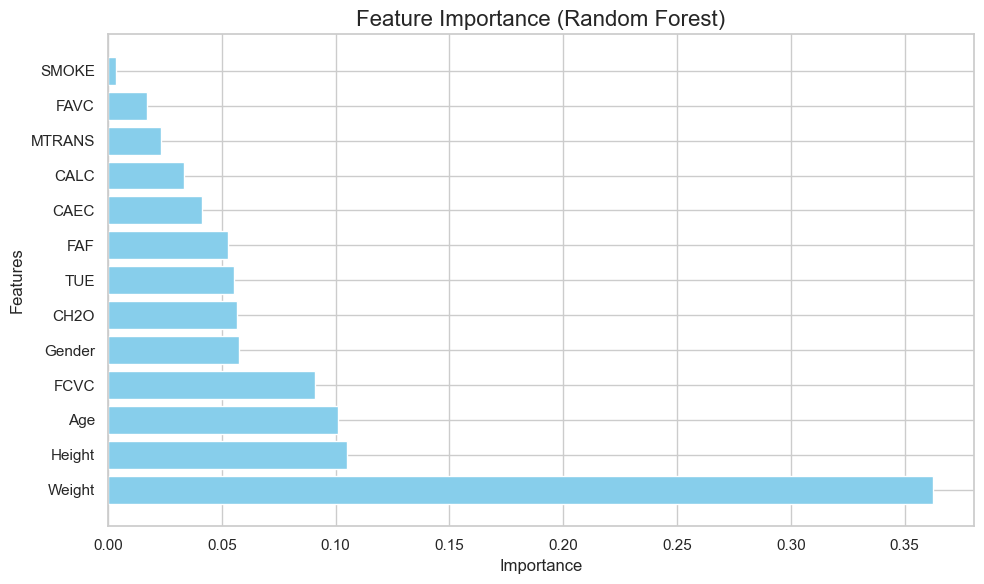

In [62]:

feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
features = train_X.columns  # Get feature names from the training set

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

##### Plot the heatmap of the confusion matrix

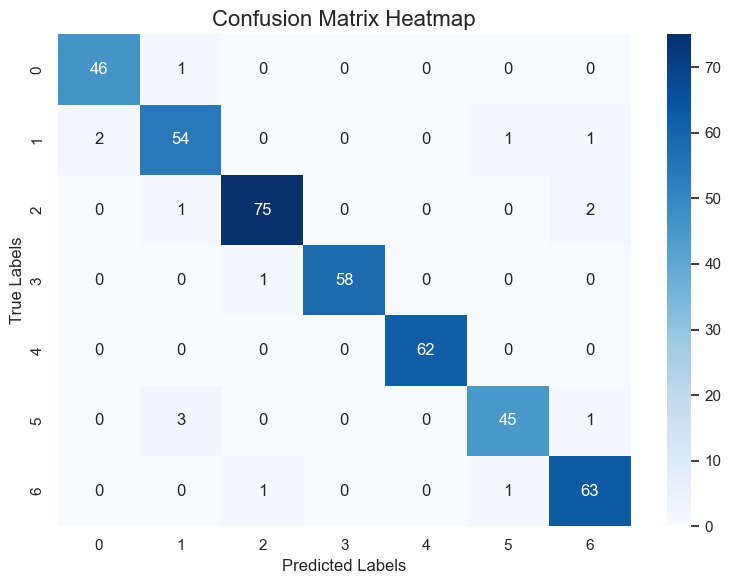

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.tight_layout()
plt.show()

## Model Evaluation

###### Logistic regression

In [65]:
# Accuracy using accuracy_score
logistic_model_accuarcy = accuracy_score(test_y, pred_logistic)
print('logistic_model_accuarcy:- %0.2f' % logistic_model_accuarcy)

logistic_model_accuarcy:- 0.89


In [66]:
logistic_model_CR = classification_report(test_y, pred_logistic)
print(logistic_model_CR)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        47
           1       1.00      0.84      0.92        58
           2       0.91      0.91      0.91        78
           3       0.91      1.00      0.95        59
           4       1.00      1.00      1.00        62
           5       0.76      0.78      0.77        49
           6       0.79      0.74      0.76        65

    accuracy                           0.89       418
   macro avg       0.89      0.90      0.89       418
weighted avg       0.90      0.89      0.89       418



##### Random forest

In [72]:
print('The accuracy of the model is :- %0.2f' %accuracy_score(test_y, pred_rf))

The accuracy of the model is :- 0.95


In [73]:
# Classification report
rf_model_CR = classification_report(test_y, pred_rf)
print(rf_model_CR)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.87      0.93      0.90        58
           2       0.96      0.97      0.97        78
           3       1.00      0.97      0.98        59
           4       1.00      1.00      1.00        62
           5       0.94      0.90      0.92        49
           6       0.97      0.95      0.96        65

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



##### AUC-ROC (Area Under Curve - Receiver Operating Characteristic): 

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [74]:
train_y_roc = label_binarize(train_y, classes=[0,1,2,3,4,5,6])
num_classes = train_y_roc.shape[1]
num_classes

7

In [75]:
test_y_roc = label_binarize(test_y, classes=[0,1,2,3,4,5,6])

In [76]:
# Using one vs rest classifier
classifier = OneVsRestClassifier(LogisticRegression(C=0.001, penalty='none', solver='newton-cg'))
classifier.fit(train_X, train_y_roc)
y_score = classifier.predict(test_X)

In [77]:
# Creating dictionary for false positive, true positive and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

In [78]:
y_score.shape

(418, 7)

In [79]:
test_y_roc.shape

(418, 7)

ROC curve for Logistic Regression

In [80]:
# Execute ROC curve and compute ROC area for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_roc[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

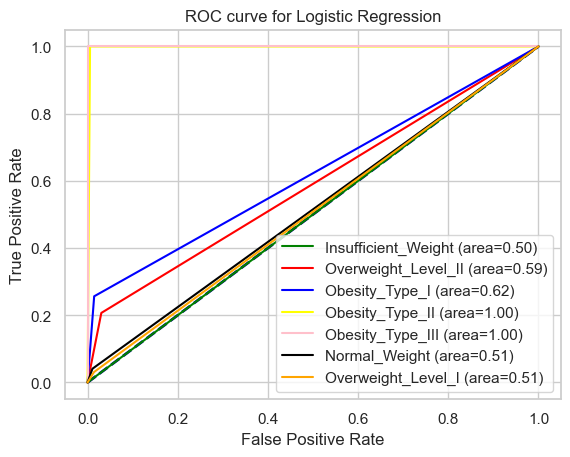

In [81]:
# Plotting ROC curve for all classes
plt.figure()
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.plot(fpr[0],tpr[0], color='green', label='Insufficient_Weight (area=%0.2f)' %roc_auc[0])
plt.plot(fpr[1],tpr[1], color='red', label='Overweight_Level_II (area=%0.2f)' %roc_auc[1])
plt.plot(fpr[2],tpr[2], color='blue', label='Obesity_Type_I (area=%0.2f)' %roc_auc[2])
plt.plot(fpr[3],tpr[3], color='yellow', label='Obesity_Type_II (area=%0.2f)' %roc_auc[3])
plt.plot(fpr[4],tpr[4], color='pink', label='Obesity_Type_III (area=%0.2f)' %roc_auc[4])
plt.plot(fpr[5],tpr[5], color='black', label='Normal_Weight (area=%0.2f)' %roc_auc[5])
plt.plot(fpr[6],tpr[6], color='orange', label='Overweight_Level_I (area=%0.2f)' %roc_auc[6])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

ROC curve for Random Forest

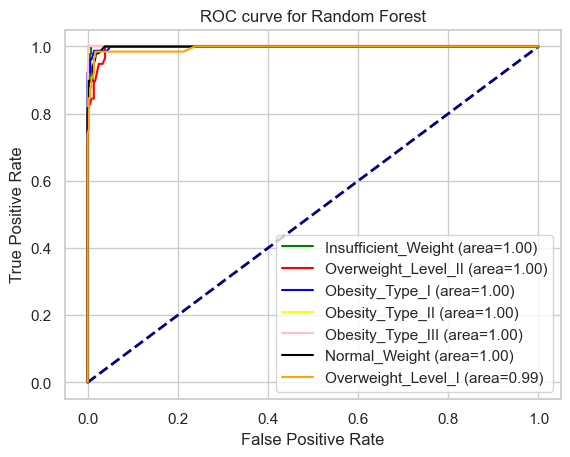

In [76]:
# Compute the ROC curve and AUC for each class
for i in range(num_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(test_y_roc[:, i], y_score_rf[:, i])  # Get the probabilities for class i
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plotting the ROC curve for all classes
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr_rf[0], tpr_rf[0], color='green', label='Insufficient_Weight (area=%0.2f)' % roc_auc_rf[0])
plt.plot(fpr_rf[1], tpr_rf[1], color='red', label='Overweight_Level_II (area=%0.2f)' % roc_auc_rf[1])
plt.plot(fpr_rf[2], tpr_rf[2], color='blue', label='Obesity_Type_I (area=%0.2f)' % roc_auc_rf[2])
plt.plot(fpr_rf[3], tpr_rf[3], color='yellow', label='Obesity_Type_II (area=%0.2f)' % roc_auc_rf[3])
plt.plot(fpr_rf[4], tpr_rf[4], color='pink', label='Obesity_Type_III (area=%0.2f)' % roc_auc_rf[4])
plt.plot(fpr_rf[5], tpr_rf[5], color='black', label='Normal_Weight (area=%0.2f)' % roc_auc_rf[5])
plt.plot(fpr_rf[6], tpr_rf[6], color='orange', label='Overweight_Level_I (area=%0.2f)' % roc_auc_rf[6])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc='lower right')
plt.show()